# Analyse et Mod√©lisation de la R√©tention des Avis Clients dans le Domaine du Commerce √âlectronique : Une Approche par R√©gression Logistique et √âvaluation Approfondie des Performances

Lien pour telecharger le jeu de donn√©es : 
https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset

## Importation des biblioth√®ques n√©cessaires et chargement de jeu de donn√©es "Amazon Customer behavior Survery" : 

In [612]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
import warnings
from itertools import combinations
from scipy.stats import chi2_contingency
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
warnings.filterwarnings('ignore')


In [613]:
data  = pd.read_csv("C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\dataset\\Amazon Customer Behavior Survey.csv")

## Analyse √©xploratoire de donn√©es : 


### Aper√ßu des donn√©es :

In [614]:
# Affichage des donn√©es : 
data

Timestamp  age             Gender  \
0    2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1    2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2    2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3    2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4    2023/06/04 5:28:06 PM GMT+5:30   22             Female   
..                              ...  ...                ...   
597  2023/06/12 4:02:02 PM GMT+5:30   23             Female   
598  2023/06/12 4:02:53 PM GMT+5:30   23             Female   
599  2023/06/12 4:03:59 PM GMT+5:30   23             Female   
600  2023/06/12 9:57:20 PM GMT+5:30   23             Female   
601  2023/06/16 9:16:05 AM GMT+5:30   23             Female   

         Purchase_Frequency  \
0         Few times a month   
1              Once a month   
2         Few times a month   
3              Once a month   
4    Less than once a month   
..                      ...   
597             Once a week   
598             Once a week   
599            Once a month   
600       Few times a month   
601             Once a week   

                                   Purchase_Categories  \
0                             Beauty and Personal Care   
1                                 Clothing and Fashion   
2      Groceries and Gourmet Food;Clothing and Fashion   
3    Beauty and Personal Care;Clothing and Fashion;...   
4        Beauty and Personal Care;Clothing and Fashion   
..                                                 ...   
597                           Beauty and Personal Care   
598                               Clothing and Fashion   
599                           Beauty and Personal Care   
600  Beauty and Personal Care;Clothing and Fashion;...   
601                               Clothing and Fashion   

    Personalized_Recommendation_Frequency    Browsing_Frequency  \
0                                     Yes      Few times a week   
1                                     Yes     Few times a month   
2                                      No     Few times a month   
3                               Sometimes     Few times a month   
4                                     Yes     Few times a month   
..                                    ...                   ...   
597                             Sometimes      Few times a week   
598                             Sometimes      Few times a week   
599                             Sometimes      Few times a week   
600                                   Yes     Few times a month   
601                             Sometimes  Multiple times a day   

    Product_Search_Method Search_Result_Exploration  \
0                 Keyword            Multiple pages   
1                 Keyword            Multiple pages   
2                 Keyword            Multiple pages   
3                 Keyword                First page   
4                  Filter            Multiple pages   
..                    ...                       ...   
597            categories            Multiple pages   
598                Filter            Multiple pages   
599            categories            Multiple pages   
600               Keyword            Multiple pages   
601               Keyword            Multiple pages   

     Customer_Reviews_Importance  ... Saveforlater_Frequency Review_Left  \
0                              1  ...              Sometimes         Yes   
1                              1  ...                 Rarely          No   
2                              2  ...                 Rarely          No   
3                              5  ...              Sometimes         Yes   
4                              1  ...                 Rarely          No   
..                           ...  ...                    ...         ...   
597                            4  ...              Sometimes         Yes   
598                            3  ...              Sometimes         Yes   
599                            3  ...            

In [615]:
#Renommer la colonne 'Personalized_Recommendation_Frequency' 
#en 'Personalized_Recommendation_Frequency_Nominale' dans les donn√©es.
data.rename(columns={'Personalized_Recommendation_Frequency':
                     'Personalized_Recommendation_Frequency_Nominale '},inplace=True)


In [616]:
# Affichages des informations des varibales : 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Timestamp                                        602 non-null    object
 1   age                                              602 non-null    int64 
 2   Gender                                           602 non-null    object
 3   Purchase_Frequency                               602 non-null    object
 4   Purchase_Categories                              602 non-null    object
 5   Personalized_Recommendation_Frequency_Nominale   602 non-null    object
 6   Browsing_Frequency                               602 non-null    object
 7   Product_Search_Method                            600 non-null    object
 8   Search_Result_Exploration                        602 non-null    object
 9   Customer_Reviews_Importance                

In [617]:
# Affichages des colonnes : 
data.columns 

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories',
       'Personalized_Recommendation_Frequency_Nominale ', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Personalized_Recommendation_Frequency ',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas'],
      dtype='object')

√†  propos des donn√©es  : 

1. age = √¢ge
2. gender = genre
3. Purchase_Frequency = How frequently do you make purchases on Amazon? (√Ä quelle fr√©quence effectuez-vous des achats sur Amazon ?)
4. Purchase_Categories = What product categories do you typically purchase on Amazon? (Dans quelles cat√©gories de produits achetez-vous g√©n√©ralement sur Amazon ?)
5. Personalized_Recommendation_Frequency = Have you ever made a purchase based on personalized product recommendations from Amazon? (Avez-vous d√©j√† effectu√© un achat bas√© sur des recommandations de produits personnalis√©es d'Amazon ?)
6. Browsing_Frequency = How often do you browse Amazon's website or app? (√Ä quelle fr√©quence parcourez-vous le site web ou l'application d'Amazon ?)
7. Product_Search_Method = How do you search for products on Amazon? (Comment recherchez-vous des produits sur Amazon ?)
8. Search_Result_Exploration = Do you tend to explore multiple pages of search results or focus on the first page? (Avez-vous tendance √† explorer plusieurs pages de r√©sultats de recherche ou √† vous concentrer sur la premi√®re page ?)
9. Customer_Reviews_Importance = How important are customer reviews in your decision-making process? (Dans quelle mesure les avis des clients sont-ils importants dans votre processus de prise de d√©cision ?)
10. Add_to_Cart_Browsing = Do you add products to your cart while browsing on Amazon? (Ajoutez-vous des produits √† votre panier tout en naviguant sur Amazon ?)
11. Cart_Completion_Frequency = How often do you complete the purchase after adding products to your cart? (√Ä quelle fr√©quence finalisez-vous un achat apr√®s avoir ajout√© des produits √† votre panier ?)
12. Cart_Abandonment_Factors = What factors influence your decision to abandon a purchase in your cart? (Quels facteurs influencent votre d√©cision d'abandonner un achat dans votre panier ?)
13. Saveforlater_Frequency = Do you use Amazon's "Save for Later" feature, and if so, how often? (Utilisez-vous la fonction "Enregistrer pour plus tard" d'Amazon, et si oui, √† quelle fr√©quence ?)
14. Review_Left = Have you ever left a product review on Amazon? (Avez-vous d√©j√† laiss√© un avis sur un produit sur Amazon ?)
15. Review_Reliability = How much do you rely on product reviews when making a purchase? (Dans quelle mesure faites-vous confiance aux avis sur les produits lorsque vous effectuez un achat ?)
16. Review_Helpfulness = Do you find helpful information from other customers' reviews? (Trouvez-vous des informations utiles dans les avis des autres clients ?)
17. Personalized_Recommendation_Frequency = How often do you receive personalized product recommendations from Amazon? (√Ä quelle fr√©quence recevez-vous des recommandations de produits personnalis√©es d'Amazon ?)
18. Recommendation_Helpfulness = Do you find the recommendations helpful? (Trouvez-vous les recommandations utiles ?)
19. Rating_Accuracy = How would you rate the relevance and accuracy of the recommendations you receive (Comment √©valueriez-vous la pertinence et la pr√©cision des recommandations que vous recevez ?)
20. Shopping_Satisfaction = How satisfied are you with your overall shopping experience on Amazon? (Dans quelle mesure √™tes-vous satisfait de votre exp√©rience d'achat globale sur Amazon ?)
23. Service_Appreciation = What aspects of Amazon's services do you appreciate the most? (Quels aspects des services d'Amazon appr√©ciez-vous le plus ?)
24. Improvement_Areas = Are there any areas where you think Amazon can improve? (Y a-t-il des domaines o√π vous pensez qu'Amazon pourrait s'am√©liorer ?)
25. Timestamp = Time and date at which the data was entered (Heure et date √† laquelle les donn√©es ont √©t√© saisies) 


### Statistiques descriptives :  

In [618]:
data.describe()

age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max                                  5.000000          5.000000   

       Shopping_Satisfaction  
count             602.000000  
mean                2.463455  
std                 1.012152  
min                 1.000000  
25%                 2.000000  
50%                 2.000000  
75%                 3.000000  
max                 5.000000

**Interpr√©tation des statistiques descriptives pour les variables : `age`, `Customer_Reviews_Importance`, `Personalized_Recommendation_Frequency`, `Rating_Accuracy`, et `Shopping_Satisfaction` :**

1. **`age`** :
   - Comptage (count) : Il y a 602 observations pour l'√¢ge, couvrant 602 clients.
   - Moyenne (mean) : L'√¢ge moyen des clients est d'environ 30.79 ans.
   - √âcart-type (std) : L'√©cart-type de 10.19 indique que l'√¢ge des clients varie consid√©rablement autour de la moyenne.
   - Minimum (min) : L'√¢ge minimum est de 3 ans, ce qui semble inhabituellement bas et n√©cessite une v√©rification de la qualit√© des donn√©es.
   - Maximum (max) : L'√¢ge maximum est de 67 ans, ce qui semble raisonnable.
   - Quartiles (25%, 50%, 75%) : Les quartiles r√©v√®lent la r√©partition de l'√¢ge. Par exemple, au 25e percentile (Q1), l'√¢ge est d'environ 23 ans, tandis qu'au 75e percentile (Q3), il est d'environ 36 ans. La m√©diane (50e percentile) est de 26 ans.

2. **`Customer_Reviews_Importance`**, **`Personalized_Recommendation_Frequency`**, **`Rating_Accuracy`**, et **`Shopping_Satisfaction`** :
   - Comptage (count) : Il y a 602 observations pour chacune de ces variables.
   - Moyenne (mean) : La moyenne pour chaque variable repr√©sente la valeur moyenne donn√©e par les clients sur une √©chelle de 1 √† 5.
   - √âcart-type (std) : L'√©cart-type mesure la dispersion des r√©ponses des clients par rapport √† la moyenne.
   - Minimum (min) : Le minimum est de 1 pour chacune de ces variables, indiquant que 1 est la note minimale possible.
   - Maximum (max) : Le maximum est de 5 pour chacune de ces variables, indiquant que 5 est la note maximale possible.
   - Quartiles (25%, 50%, 75%) : Les quartiles montrent la r√©partition des r√©ponses des clients pour chaque variable.

Ces statistiques offrent un aper√ßu des caract√©ristiques des variables et de leur distribution. Par exemple, pour `age`, nous observons une large dispersion d'√¢ges, de 3 √† 67 ans, avec une moyenne d'environ 30.79 ans. Pour les autres variables, les √©valuations varient de 1 √† 5, avec des moyennes sp√©cifiques et des niveaux de dispersion distincts. Ces informations sont utiles pour mieux comprendre les donn√©es et orienter les d√©cisions relatives √† la segmentation des clients ou √† d'autres analyses ult√©rieures.

In [621]:
data.drop(data[data['age'] == 3].index, axis=0, inplace=True)

### Distributions des variables  : 

Quelle est la r√©partition de l'√¢ge des clients et quel est l'√¢ge moyen ?

In [622]:
# comptes des valeurs unique de variable age : 
data['age'].value_counts()

age
23    123
34     48
24     40
25     36
45     34
21     30
26     27
32     19
27     17
22     17
36     16
35     15
37     14
40     12
46     12
29      9
31      9
28      9
30      8
56      8
33      7
18      7
47      6
54      6
43      6
50      5
44      5
20      5
16      5
38      4
41      4
19      4
39      4
17      4
42      4
48      3
60      3
67      2
15      2
57      2
53      2
64      1
58      1
49      1
63      1
52      1
55      1
62      1
12      1
Name: count, dtype: int64

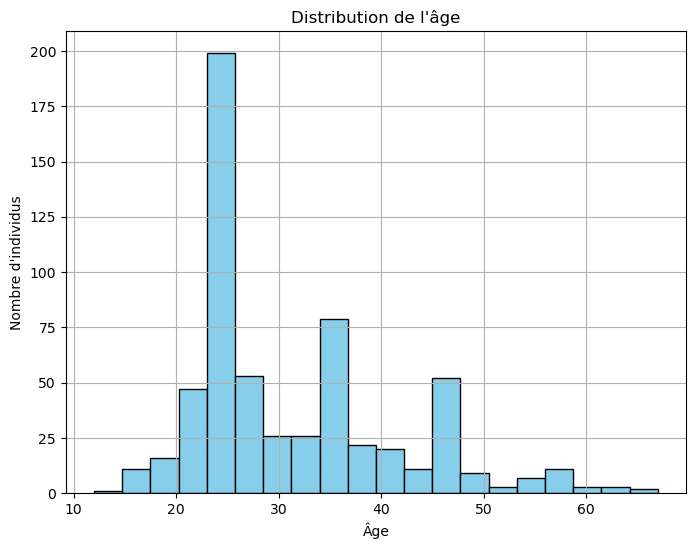

In [623]:
# vizualisation de la distribution de l'age : 
plt.figure(figsize=(8,6))
plt.hist(data['age'],bins=20,color='skyblue',edgecolor='black')
plt.title('Distribution de l\'√¢ge')
plt.xlabel('√Çge')
plt.ylabel('Nombre d\'individus')
plt.grid(True)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\1 Distribution de l\'√¢ge.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()


La r√©partition des √¢ges des clients dans notre jeu de donn√©es est la suivante :

- L'√¢ge le plus fr√©quent est de 23 ans, avec 123 individus.
- L'√¢ge le moins fr√©quent est de 64 ans, avec seulement 1 individu.
- Plusieurs autres √¢ges ont un nombre relativement √©lev√© d'individus, tels que 34 ans (48 individus), 24 ans (40 individus) et 25 ans (36 individus).

D'apr√®s le tableau de la statistique descriptive, l'√¢ge moyen est de 30 ans.

**Quelle est la r√©partition des genres des clients (homme, femme, autre) ?**

In [625]:
data['Gender'].value_counts()

Gender
Female               352
Male                 142
Prefer not to say     88
Others                19
Name: count, dtype: int64

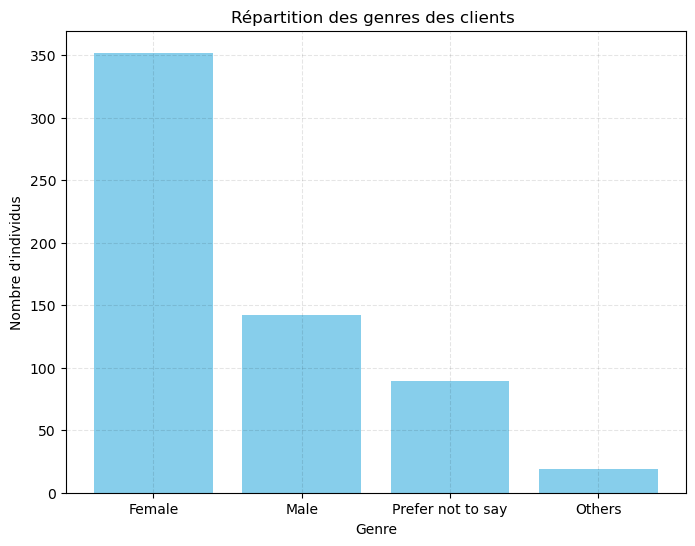

In [626]:
Gender_Frequency = [352,142,89,19]
Genre = ['Female','Male','Prefer not to say','Others']
plt.figure(figsize=(8,6))
plt.bar(Genre,Gender_Frequency,color='skyblue')
plt.title('R√©partition des genres des clients ')
plt.xlabel("Genre")
plt.ylabel("Nombre d\'individus")
plt.grid(True,linestyle='--',color='black',alpha=0.1)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\2 R√©partition des genres des clients.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres, voici l'interpr√©tation des donn√©es :

- **Femmes** : Il y a plus de clientes f√©minines que toute autre cat√©gorie. Cela pourrait indiquer que les produits ou services offerts sont plus populaires ou plus cibl√©s vers les femmes.
- **Hommes** : Le nombre de clients masculins est inf√©rieur √† celui des femmes, mais reste une part importante de la client√®le.
- **Pr√©f√®re ne pas dire** : Un certain nombre de clients ont choisi de ne pas divulguer leur genre. Cela pourrait indiquer une pr√©f√©rence pour la confidentialit√© ou l'anonymat.
- **Autres** : Il y a moins de clients qui s'identifient comme "autres". Cela pourrait inclure une vari√©t√© de genres non binaires ou non conformes.

la r√©partition des genres des clients est donc domin√©e par les femmes, suivies des hommes, avec un nombre plus petit de clients qui pr√©f√®rent ne pas divulguer leur genre ou qui s'identifient comme "autres". Cette information pourrait √™tre utile pour comprendre le profil d√©mographique de notre client√®le et pour √©laborer des strat√©gies de marketing cibl√©es.

**√Ä quelle fr√©quence les clients effectuent-ils des achats sur Amazon ?**

In [627]:
data['Purchase_Frequency'].value_counts()

Purchase_Frequency
Few times a month         203
Less than once a month    124
Once a week               112
Once a month              106
Multiple times a week      56
Name: count, dtype: int64

Certainly! Here are 10 other color palettes that you can consider using in Seaborn:

'deep'
'muted'
'colorblind'
'husl'
'pastel'
'dark'
'RdBu_r'
'cubehelix'
'Set2'
'Paired'

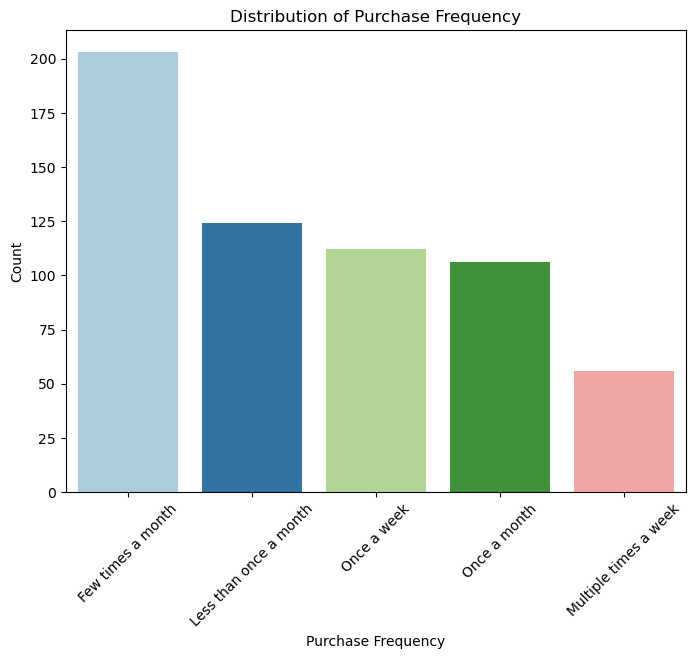

In [628]:
# Count the occurrences of each category
purchase_frequency_counts = data['Purchase_Frequency'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=purchase_frequency_counts.index, y=purchase_frequency_counts.values, palette='Paired')

# Add labels and title
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.title('Distribution of Purchase Frequency')
plt.xticks(rotation=45)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\3 Distribution of Purchase Frequency.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
# Show the plot
plt.show()


D'apr√®s le graphique √† barres :

- **Une fois par mois** : C'est la fr√©quence d'achat la plus courante parmi les clients, avec environ 175 personnes effectuant des achats mensuels. Cela pourrait indiquer que la majorit√© des clients utilisent Amazon pour des achats r√©guliers ou planifi√©s.

- **2-3 fois par mois** : Un nombre significatif de clients ach√®te 2 √† 3 fois par mois. Ces clients pourraient √™tre ceux qui effectuent des achats plus fr√©quents ou qui utilisent Amazon pour des besoins vari√©s.

- **Une fois par semaine** : Un nombre plus restreint de clients effectue des achats une fois par semaine. Ces clients pourraient √™tre ceux qui d√©pendent fortement d'Amazon pour leurs achats hebdomadaires.

- **2-3 fois par semaine** : Tr√®s peu de clients ach√®tent 2 √† 3 fois par semaine. Ces clients pourraient √™tre ceux qui font des achats fr√©quents ou qui d√©pendent fortement d'Amazon pour leurs besoins quotidiens.

- **4+ fois par semaine** : Le nombre de clients qui ach√®tent 4 fois ou plus par semaine est le plus bas, avec environ 25 personnes. Ces clients pourraient √™tre ceux qui utilisent Amazon pour une grande vari√©t√© de besoins ou qui effectuent des achats fr√©quents.

La majorit√© des clients effectuent des achats sur Amazon une fois par mois, suivis de ceux qui ach√®tent 2 √† 3 fois par mois. Un nombre plus restreint de clients effectue des achats une fois par semaine ou plus. Cette information pourrait √™tre utile pour comprendre les habitudes d'achat de notre client√®le et √©laborer des strat√©gies de marketing cibl√©es.

**Quelles cat√©gories de produits sont les plus populaires parmi les clients d'Amazon ?**

In [231]:
data['Purchase_Categories'].unique()

array(['Beauty and Personal Care', 'Clothing and Fashion',
       'Groceries and Gourmet Food;Clothing and Fashion',
       'Beauty and Personal Care;Clothing and Fashion;others',
       'Beauty and Personal Care;Clothing and Fashion',
       'Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Clothing and Fashion;Home and Kitchen', 'others',
       'Clothing and Fashion;others',
       'Beauty and Personal Care;Home and Kitchen',
       'Groceries and Gourmet Food',
       'Groceries and Gourmet Food;Clothing and Fashion;others',
       'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others',
       'Home and Kitchen', 'Beauty and Personal Care;others',
       'Beauty and Personal Care;Home and Kitchen;others',
       'Home and Kitchen;others',
       'Groceries and Gourmet Food;Home and Kitchen',
       'Beauty and Person

**Remarque :** Il est √† noter que les cat√©gories semblent √™tre correctement r√©pertori√©es dans les donn√©es, cependant, certaines d'entre elles sont des combinaisons de plusieurs cat√©gories. Cette observation sugg√®re la pr√©sence de cat√©gories d'achat multiples ou de regroupements de produits au sein de l'√©chantillon, ce qui peut fournir des informations pr√©cieuses sur les pr√©f√©rences d'achat des clients.

On va faire des √©tapes pour r√©soudre ce probl√®me : 

In [301]:
# √©tape 1 (Netoyage des categories ) : 
#Pour garantir que toutes les cat√©gories sont uniformes, sans espaces suppl√©mentaires et en lettres minuscules. 
data['Purchase_Categories'] = data['Purchase_Categories'].str.strip().str.lower()

In [302]:
# √©tape 2 cr√©ation d'une dataFrame de categorie et counts 
category_counts = data['Purchase_Categories'].value_counts()
df = category_counts.reset_index()
df.columns = ['Category','Counts']
print(df)

                                             Category  Counts
0                            beauty and personal care     106
1                                clothing and fashion     106
2                                              others      48
3       beauty and personal care;clothing and fashion      46
4   beauty and personal care;clothing and fashion;...      42
5   groceries and gourmet food;beauty and personal...      32
6               clothing and fashion;home and kitchen      27
7                                    home and kitchen      24
8           beauty and personal care;home and kitchen      21
9        clothing and fashion;home and kitchen;others      16
10                        clothing and fashion;others      14
11                         groceries and gourmet food      14
12  groceries and gourmet food;beauty and personal...      14
13  beauty and personal care;clothing and fashion;...      12
14  groceries and gourmet food;beauty and personal...      10
15      

In [303]:
# √©tape 3 determination de categorie unique (sans combinaison )
unique_categories = []
categories =df['Category'].unique()
# Parcourir chaque cat√©gorie dans la liste initiale
for category in categories:
    # Diviser la cat√©gorie en sous-cat√©gories en utilisant ';' comme s√©parateur
    sub_categories = category.split(';')
    
    # Parcourir chaque sous-cat√©gorie
    for sub_category in sub_categories:
        # Si la sous-cat√©gorie n'est pas d√©j√† dans la liste des cat√©gories uniques, l'ajouter
        if sub_category not in unique_categories:
            unique_categories.append(sub_category)

# Afficher la liste des cat√©gories uniques
print(unique_categories)


['beauty and personal care', 'clothing and fashion', 'others', 'home and kitchen', 'groceries and gourmet food']


In [305]:
# √©tape 4 calcule de comptage de chaque categorie unique : 
unique_categories = ['beauty and personal care', 'clothing and fashion', 'others', 'home and kitchen', 'groceries and gourmet food']

# Initialiser un dictionnaire pour stocker les sommes des Counts
sum_counts_dict = {}

# Parcourir chaque cat√©gorie dans la liste unique_categories
for category in unique_categories:
    # Filtrer les lignes o√π la cat√©gorie contient la cat√©gorie actuelle
    category_df = df[df['Category'].str.contains(category)]
    
    # Calculer la somme des Counts pour ces lignes
    sum_counts = category_df['Counts'].sum()
    
    # Ajouter la somme des Counts √† la cat√©gorie correspondante dans le dictionnaire
    sum_counts_dict[category] = sum_counts

In [306]:
# finalement, on trouve le r√©sultats : 
# Convertir le dictionnaire en DataFrame
df_counts = pd.DataFrame(list(sum_counts_dict.items()), columns=['Category', 'Counts'])

# Afficher le DataFrame
df_counts


Category  Counts
0    beauty and personal care     318
1        clothing and fashion     343
2                      others     166
3            home and kitchen     220
4  groceries and gourmet food     111

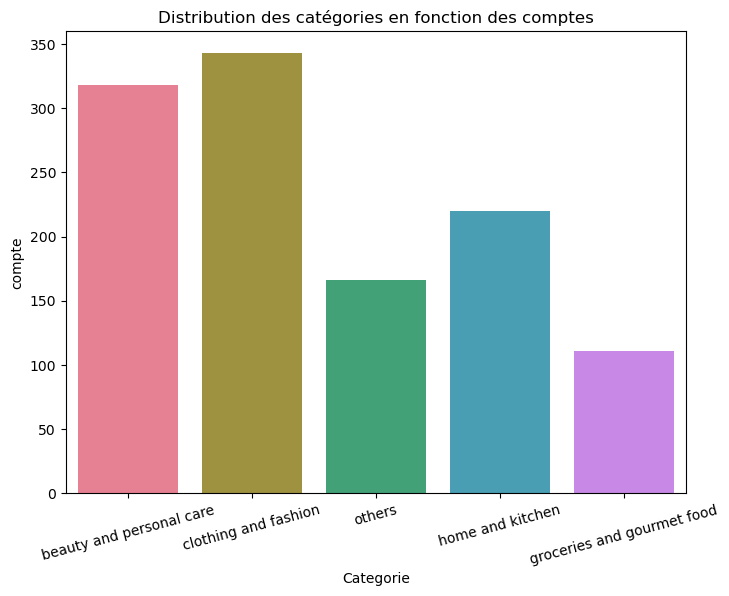

In [400]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_counts['Category'],y=df_counts['Counts'],palette='husl')
plt.title('Distribution des cat√©gories en fonction des comptes')
plt.xlabel('Categorie')
plt.ylabel('compte')
plt.xticks(rotation=15)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\4 Distribution des cat√©gories en fonction des comptes.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()


D'apr√®s le graphique √† barres:

- **Beaut√© et soins personnels** : Cette cat√©gorie a le plus grand nombre de comptes associ√©s, ce qui indique qu'elle est la plus populaire parmi les clients d'Amazon. Les produits de beaut√© et de soins personnels sont souvent achet√©s en ligne pour leur commodit√© et leur vari√©t√©.
- **V√™tements et mode** : Cette cat√©gorie est la deuxi√®me plus populaire parmi les clients d'Amazon. Cela pourrait indiquer que les clients appr√©cient la large s√©lection de v√™tements et d'accessoires de mode disponibles sur Amazon.
- **Maison et cuisine** : Cette cat√©gorie est √©galement populaire parmi les clients d'Amazon, avec un nombre significatif de comptes associ√©s. Cela pourrait indiquer que les clients appr√©cient la commodit√© d'acheter des articles m√©nagers et de cuisine en ligne.
- **√âpicerie et gastronomie** : Cette cat√©gorie a le moins de comptes associ√©s, ce qui pourrait indiquer que moins de clients ach√®tent des produits d'√©picerie et gastronomiques sur Amazon par rapport aux autres cat√©gories.

Les cat√©gories de produits les plus populaires parmi les clients d'Amazon sont la beaut√© et les soins personnels, les v√™tements et la mode, et la maison et la cuisine.

conclusion sur les 3 images pr√©cidentes :
    

1. **Genre des clients** : La premi√®re image montre que la majorit√© des clients sont des femmes. Cela pourrait influencer les types de produits qui sont les plus populaires, comme le montre la troisi√®me image.

2. **Fr√©quence d'achat** : La deuxi√®me image montre que la plupart des clients ach√®tent une fois par mois. Cela pourrait indiquer que les clients pr√©f√®rent acheter en gros ou planifier leurs achats, ce qui pourrait √©galement influencer les types de produits qu'ils ach√®tent.

3. **Cat√©gories de produits populaires** : La troisi√®me image montre que les cat√©gories de produits les plus populaires sont la beaut√© et les soins personnels, les v√™tements et la mode, et la maison et la cuisine. Cela pourrait √™tre li√© au genre des clients (plus de femmes) et √† leur fr√©quence d'achat (une fois par mois).

En combinant ces informations, on pourrait dire que les femmes qui ach√®tent une fois par mois sont susceptibles d'acheter des produits de beaut√© et de soins personnels, des v√™tements et de la mode, et des articles pour la maison et la cuisine. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire, comme une analyse de corr√©lation ou une analyse de r√©gression.

 **√Ä quelle fr√©quence les clients parcourent-ils le site web ou l'application d'Amazon ?**

In [318]:
data['Browsing_Frequency'].value_counts()

Browsing_Frequency
Few times a week        249
Few times a month       199
Rarely                   77
Multiple times a day     77
Name: count, dtype: int64

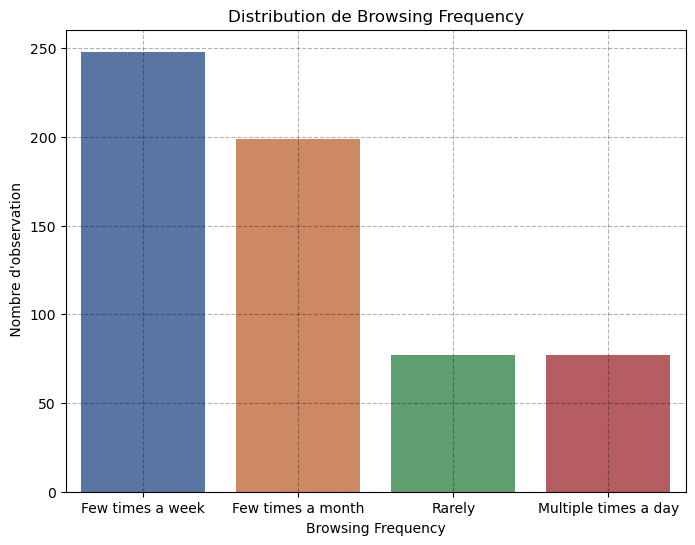

In [402]:
data_B_F = data['Browsing_Frequency'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=data_B_F.index,y=data_B_F,palette='deep')
plt.title('Distribution de Browsing Frequency')
plt.xlabel('Browsing Frequency')
plt.ylabel(' Nombre d\'observation')
plt.grid(True,color='black',linestyle='--',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\6 Distribution de Browsing Frequency.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres: 

- **Quelques fois par semaine** : La majorit√© des clients, repr√©sent√©s par la barre bleue la plus haute, parcourent le site web ou l'application d'Amazon quelques fois par semaine. Cela pourrait indiquer que ces clients utilisent r√©guli√®rement Amazon pour parcourir les produits, lire les critiques, comparer les prix, etc.
- **Quelques fois par mois** : Un nombre significatif de clients, repr√©sent√©s par la barre orange, parcourent le site web ou l'application d'Amazon quelques fois par mois. Cela pourrait indiquer que ces clients utilisent Amazon moins fr√©quemment, peut-√™tre pour des achats planifi√©s ou occasionnels.
- **Plusieurs fois par jour** : Un nombre plus petit de clients, repr√©sent√©s par la barre verte, parcourent le site web ou l'application d'Amazon plusieurs fois par jour. Ces clients pourraient √™tre ceux qui d√©pendent fortement d'Amazon pour leurs besoins quotidiens ou qui font des achats fr√©quents.
- **Rarement** : Le nombre de clients qui parcourent rarement le site web ou l'application d'Amazon, repr√©sent√©s par la barre rouge, est le plus bas. Ces clients pourraient √™tre ceux qui utilisent Amazon tr√®s occasionnellement ou qui pr√©f√®rent d'autres m√©thodes d'achat.

La majorit√© des clients parcourent le site web ou l'application d'Amazon quelques fois par semaine, suivis de ceux qui le font quelques fois par mois. Un nombre plus petit de clients le font plusieurs fois par jour ou rarement.

La fr√©quence de navigation pourrait √™tre li√©e √† la fr√©quence d'achat (deuxi√®me image) et √† l'utilisation des recommandations de produits personnalis√©es (quatri√®me image). Par exemple, les clients qui parcourent le site plusieurs fois par jour pourraient √™tre plus susceptibles d'acheter fr√©quemment et d'utiliser des recommandations de produits personnalis√©es. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire.

**Comment les clients recherchent-ils des produits sur Amazon, et quel est le moyen le plus courant de recherche ?**

In [328]:
data['Product_Search_Method'].value_counts()

Product_Search_Method
categories    223
Keyword       214
Filter        127
others         36
Name: count, dtype: int64

In [329]:
# v√©rifi√© s'il y a des valeurs manquantes dans cette colonnes : 
data['Product_Search_Method'].isna().sum()

2

In [330]:
mode_value = data['Product_Search_Method'].mode()[0]
data['Product_Search_Method'] = data['Product_Search_Method'].fillna(mode_value)

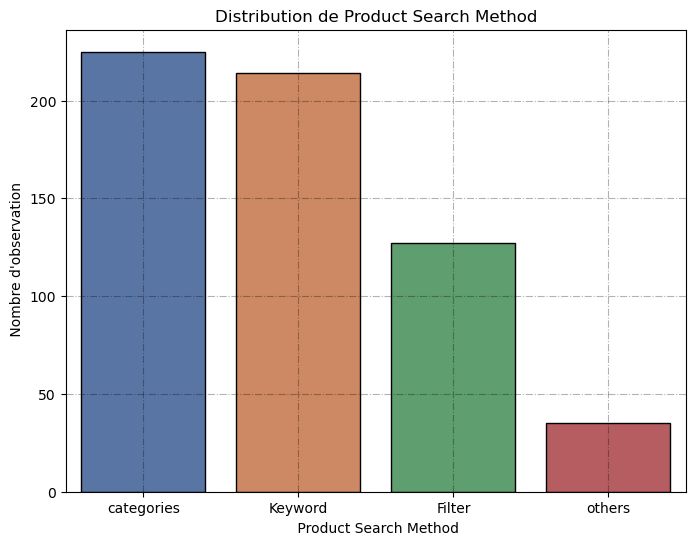

In [403]:
data_S_M =data['Product_Search_Method'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=data_S_M.index,y=data_S_M,palette='deep',edgecolor='black')
plt.title('Distribution de Product Search Method')
plt.xlabel(' Product Search Method')
plt.ylabel(' Nombre d\'observation')
plt.grid(True,linestyle='dashdot',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\7 Distribution de Product Search Method.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres :

- **Mots-cl√©s** : La majorit√© des clients, repr√©sent√©s par la barre bleue la plus haute, recherchent des produits en utilisant des mots-cl√©s. Cela pourrait indiquer que ces clients ont une id√©e pr√©cise de ce qu'ils cherchent et utilisent des mots-cl√©s pour trouver rapidement et efficacement le produit souhait√©.
- **Cat√©gories** : Un nombre significatif de clients, repr√©sent√©s par la barre orange, recherchent des produits en naviguant dans les cat√©gories. Cela pourrait indiquer que ces clients pr√©f√®rent explorer une vari√©t√© de produits dans une certaine cat√©gorie avant de faire un choix.
- **Filtres** : Un nombre plus petit de clients, repr√©sent√©s par la barre verte, utilisent des filtres pour rechercher des produits. Ces clients pourraient √™tre ceux qui ont des crit√®res sp√©cifiques pour les produits qu'ils recherchent, comme la gamme de prix, la marque, la note des clients, etc.
- **Autres** : Le nombre de clients qui utilisent d'autres m√©thodes pour rechercher des produits, repr√©sent√©s par la barre rouge, est le plus bas. Ces m√©thodes pourraient inclure des choses comme la navigation al√©atoire, l'utilisation de recommandations de produits personnalis√©es, etc.

La majorit√© des clients recherchent des produits sur Amazon en utilisant des mots-cl√©s, suivis de ceux qui naviguent dans les cat√©gories. Un nombre plus petit de clients utilise des filtres ou d'autres m√©thodes pour rechercher des produits.

La m√©thode de recherche de produits pourrait √™tre li√©e √† la fr√©quence de navigation (cinqui√®me image) et √† l'utilisation des recommandations de produits personnalis√©es (quatri√®me image). Par exemple, les clients qui parcourent le site plusieurs fois par jour pourraient √™tre plus susceptibles d'utiliser des mots-cl√©s pour rechercher des produits, tandis que ceux qui le font moins fr√©quemment pourraient √™tre plus susceptibles de naviguer dans les cat√©gories. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire.

**Les clients ont-ils tendance √† explorer plusieurs pages de r√©sultats de recherche ou √† se concentrer sur la premi√®re page ?**

In [335]:
data_S_R_E=data['Search_Result_Exploration'].value_counts()

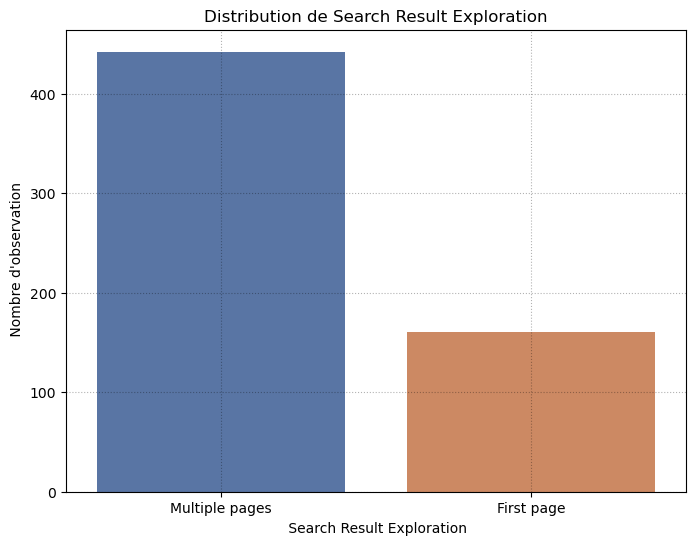

In [406]:
plt.figure(figsize=(8,6))
sns.barplot(x=data_S_R_E.index,y=data_S_R_E,palette='deep')
plt.title('Distribution de Search Result Exploration')
plt.xlabel(' Search Result Exploration')
plt.ylabel(' Nombre d\'observation')
plt.grid(True,linestyle=':',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\8 Distribution de Search Result Exploration.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()
plt.show()

D'apr√®s le graphique √† barres :

- **Plusieurs pages** : La majorit√© des clients, repr√©sent√©s par la barre bleue la plus haute, ont tendance √† explorer plusieurs pages de r√©sultats de recherche. Cela pourrait indiquer que ces clients sont pr√™ts √† passer du temps √† chercher le produit parfait et ne se limitent pas aux produits pr√©sent√©s sur la premi√®re page.
- **Premi√®re page** : Un nombre plus petit de clients, repr√©sent√©s par la barre orange, se concentrent sur la premi√®re page des r√©sultats de recherche. Ces clients pourraient √™tre ceux qui pr√©f√®rent faire des achats rapidement ou qui font confiance aux algorithmes d'Amazon pour pr√©senter les meilleurs produits en premier.

La majorit√© des clients ont tendance √† explorer plusieurs pages de r√©sultats de recherche, tandis qu'un nombre plus petit de clients se concentre sur la premi√®re page.

L'exploration des r√©sultats de recherche pourrait √™tre li√©e √† la m√©thode de recherche de produits (septi√®me image) et √† la fr√©quence de navigation (cinqui√®me image). Par exemple, les clients qui utilisent des mots-cl√©s pour rechercher des produits pourraient √™tre plus susceptibles d'explorer plusieurs pages de r√©sultats, tandis que ceux qui naviguent dans les cat√©gories pourraient √™tre plus susceptibles de se concentrer sur la premi√®re page. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire.

**Dans quelle mesure les avis des clients sont-ils importants dans le processus de prise de d√©cision des clients ?**

In [339]:
data_C_R_I = data['Customer_Reviews_Importance'].value_counts()

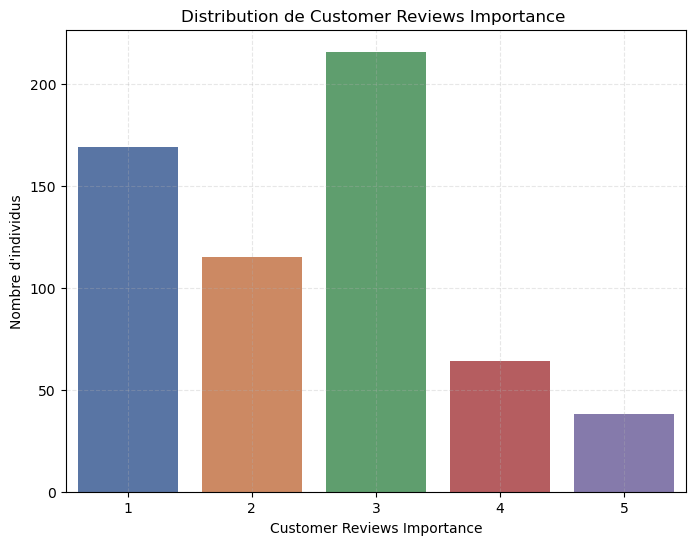

In [407]:
plt.figure(figsize = (8,6))
sns.barplot(x=data_C_R_I.index,y=data_C_R_I,palette='deep')
plt.title('Distribution de Customer Reviews Importance ')
plt.xlabel('Customer Reviews Importance')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\9 Distribution de Customer Reviews Importance.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres :

- **3 sur 5** : La majorit√© des clients, repr√©sent√©s par la barre la plus haute, ont √©valu√© l'importance des avis des clients comme √©tant de 3 sur 5. Cela pourrait indiquer que ces clients consid√®rent les avis des clients comme mod√©r√©ment importants dans leur processus de prise de d√©cision.
- **2 sur 5** : Un nombre significatif de clients, repr√©sent√©s par la deuxi√®me barre la plus haute, ont √©valu√© l'importance des avis des clients comme √©tant de 2 sur 5. Cela pourrait indiquer que ces clients consid√®rent les avis des clients comme √©tant d'une importance relativement faible dans leur processus de prise de d√©cision.
- **1 sur 5** : Un nombre plus petit de clients, repr√©sent√©s par la troisi√®me barre la plus haute, ont √©valu√© l'importance des avis des clients comme √©tant de 1 sur 5. Ces clients pourraient √™tre ceux qui ne consid√®rent pas les avis des clients comme importants dans leur processus de prise de d√©cision.

La majorit√© des clients consid√®rent que les avis des clients sont mod√©r√©ment importants dans leur processus de prise de d√©cision, tandis qu'un nombre significatif de clients les consid√®rent comme relativement peu importants.

L'importance des avis des clients pourrait √™tre li√©e √† la m√©thode de recherche de produits (septi√®me image) et √† l'exploration des r√©sultats de recherche (huiti√®me image). Par exemple, les clients qui utilisent des mots-cl√©s pour rechercher des produits et qui explorent plusieurs pages de r√©sultats pourraient √™tre plus susceptibles de consid√©rer les avis des clients comme importants dans leur processus de prise de d√©cision. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire.

**Combien de clients ajoutent des produits √† leur panier tout en naviguant sur Amazon ?**

In [345]:
data_A_T_C_B = data['Add_to_Cart_Browsing'].value_counts()

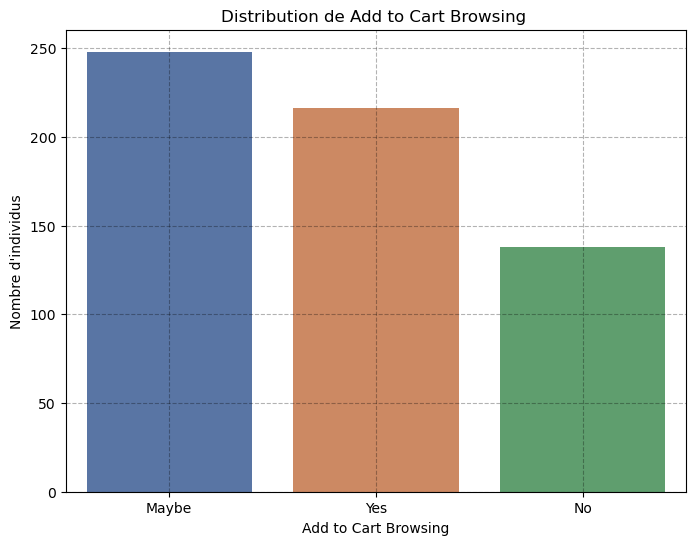

In [408]:
plt.figure(figsize = (8,6))
sns.barplot(x=data_A_T_C_B.index,y=data_A_T_C_B,palette='deep')
plt.title('Distribution de Add to Cart Browsing ')
plt.xlabel('Add to Cart Browsing')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\10 Distribution de Add to Cart Browsing.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres :

- **Peut-√™tre** : La majorit√© des clients, repr√©sent√©s par la barre bleue la plus haute, ont r√©pondu "Peut-√™tre" √† la question de savoir s'ils ajoutent des produits √† leur panier tout en naviguant sur Amazon. Cela pourrait indiquer que ces clients sont incertains ou qu'ils ajoutent parfois des produits √† leur panier pendant la navigation, en fonction de divers facteurs tels que le produit, le prix, les avis, etc.
- **Oui** : Un nombre significatif de clients, repr√©sent√©s par la barre orange, ont r√©pondu "Oui". Cela pourrait indiquer que ces clients ont tendance √† ajouter des produits √† leur panier pendant la navigation, peut-√™tre pour les sauvegarder pour un achat futur ou pour les comparer √† d'autres produits.
- **Non** : Un nombre plus petit de clients, repr√©sent√©s par la barre verte, ont r√©pondu "Non". Ces clients pourraient √™tre ceux qui pr√©f√®rent naviguer et rechercher des produits sans les ajouter √† leur panier.

La majorit√© des clients sont incertains quant √† l'ajout de produits √† leur panier tout en naviguant sur Amazon, tandis qu'un nombre significatif de clients le font et un nombre plus petit de clients ne le font pas.

L'ajout de produits au panier pendant la navigation pourrait √™tre li√© √† la m√©thode de recherche de produits (septi√®me image), √† l'exploration des r√©sultats de recherche (huiti√®me image) et √† l'importance des avis des clients (neuvi√®me image). Par exemple, les clients qui utilisent des mots-cl√©s pour rechercher des produits, qui explorent plusieurs pages de r√©sultats et qui consid√®rent les avis des clients comme importants pourraient √™tre plus susceptibles d'ajouter des produits √† leur panier pendant la navigation. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire.

**√Ä quelle fr√©quence les clients finalisent-ils un achat apr√®s avoir ajout√© des produits √† leur panier ?**

In [349]:
data_C_C_F = data['Cart_Completion_Frequency'].value_counts()

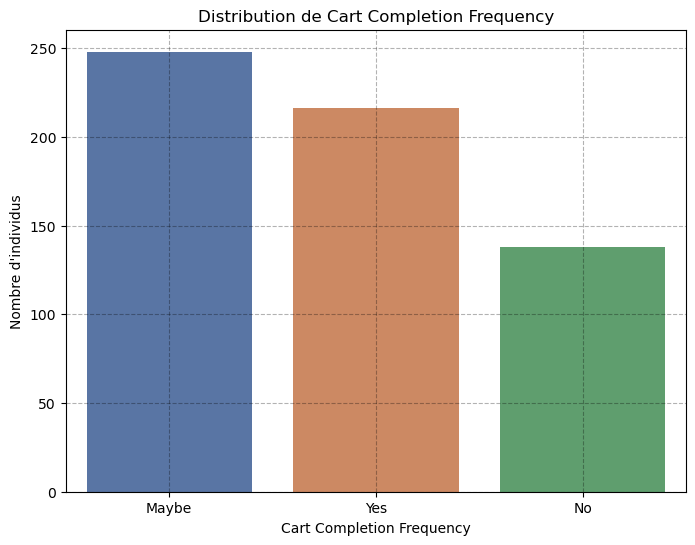

In [409]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_A_T_C_B.index,y=data_A_T_C_B,palette='deep')
plt.title('Distribution de Cart Completion Frequency')
plt.xlabel('Cart Completion Frequency')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\11 Distribution de Cart Completion Frequency.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres:

- **Peut-√™tre** : La majorit√© des clients, repr√©sent√©s par la barre bleue la plus haute, ont r√©pondu "Peut-√™tre" √† la question de savoir s'ils finalisent un achat apr√®s avoir ajout√© des produits √† leur panier. Cela pourrait indiquer que ces clients sont incertains ou qu'ils finalisent parfois un achat apr√®s avoir ajout√© des produits √† leur panier, en fonction de divers facteurs tels que le produit, le prix, les avis, etc.
- **Oui** : Un nombre significatif de clients, repr√©sent√©s par la barre orange, ont r√©pondu "Oui". Cela pourrait indiquer que ces clients ont tendance √† finaliser un achat apr√®s avoir ajout√© des produits √† leur panier. Ces clients pourraient √™tre ceux qui planifient leurs achats ou qui sont s√ªrs de ce qu'ils veulent.
- **Non** : Un nombre plus petit de clients, repr√©sent√©s par la barre verte, ont r√©pondu "Non". Ces clients pourraient √™tre ceux qui ajoutent des produits √† leur panier pour les sauvegarder pour plus tard ou pour les comparer √† d'autres produits, mais ne finalisent pas toujours l'achat.

La majorit√© des clients sont incertains quant √† la finalisation d'un achat apr√®s avoir ajout√© des produits √† leur panier, tandis qu'un nombre significatif de clients le font et un nombre plus petit de clients ne le font pas.

La finalisation d'un achat apr√®s avoir ajout√© des produits au panier pourrait √™tre li√©e √† l'ajout de produits au panier pendant la navigation (dixi√®me image), √† la m√©thode de recherche de produits (septi√®me image), √† l'exploration des r√©sultats de recherche (huiti√®me image) et √† l'importance des avis des clients (neuvi√®me image). Par exemple, les clients qui ajoutent des produits √† leur panier pendant la navigation, qui utilisent des mots-cl√©s pour rechercher des produits, qui explorent plusieurs pages de r√©sultats et qui consid√®rent les avis des clients comme importants pourraient √™tre plus susceptibles de finaliser un achat apr√®s avoir ajout√© des produits √† leur panier. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire. üòä

**Quels facteurs influencent la d√©cision des clients d'abandonner un achat dans leur panier ?**

In [352]:
data_C_A_F = data['Cart_Abandonment_Factors'].value_counts()

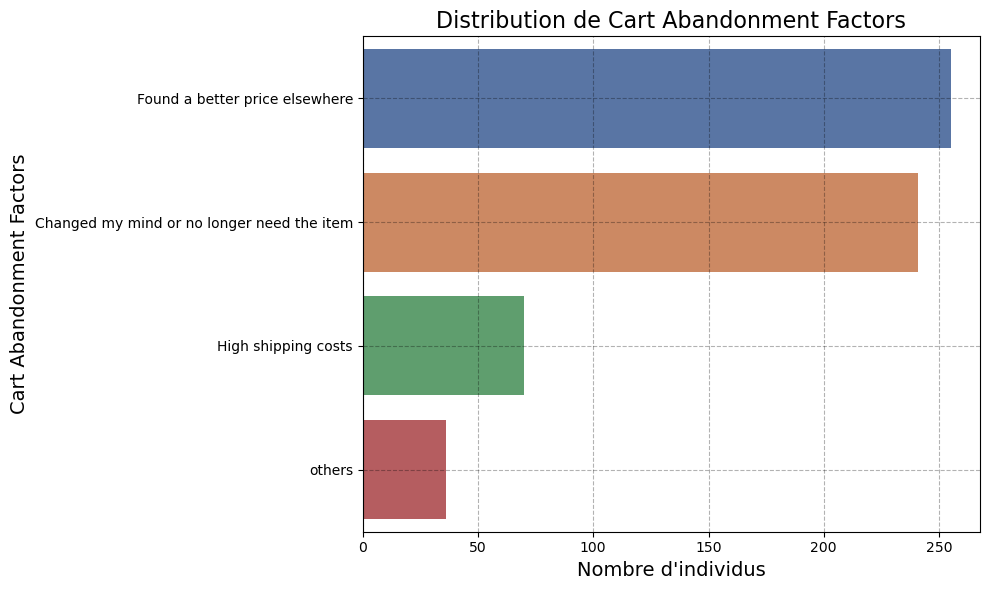

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Aggregate similar categories, you need to customize this based on your data
data['Grouped_Categories'] = data['Cart_Abandonment_Factors'].replace({
    'Category1': 'Group1',
    'Category2': 'Group1',
    'Category3': 'Group2',
    # Add more mappings as needed
})

# Count the occurrences of each grouped factor
factor_counts = data['Grouped_Categories'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=factor_counts.values, y=factor_counts.index, palette='deep', orient='h')

# Title and labels
plt.title('Distribution de Cart Abandonment Factors', fontsize=16)
plt.xlabel('Nombre d\'individus', fontsize=14)
plt.ylabel('Cart Abandonment Factors', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', color='black', alpha=0.3)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


D'apr√®s le graphique √† barres :

- **Trouv√© un meilleur prix ailleurs** : La majorit√© des clients, repr√©sent√©s par la barre bleue la plus haute, abandonnent un achat parce qu'ils ont trouv√© un meilleur prix ailleurs. Cela pourrait indiquer que ces clients sont sensibles au prix et cherchent toujours la meilleure affaire.
- **N'a plus besoin de l'article** : Un nombre significatif de clients, repr√©sent√©s par la barre orange, abandonnent un achat parce qu'ils n'ont plus besoin de l'article. Cela pourrait indiquer que ces clients ajoutent des articles √† leur panier pour les sauvegarder pour plus tard, mais peuvent changer d'avis ou trouver une alternative entre-temps.
- **Frais de livraison √©lev√©s** : Un nombre plus petit de clients, repr√©sent√©s par la barre verte, abandonnent un achat en raison de frais de livraison √©lev√©s. Ces clients pourraient √™tre ceux qui attendent des frais de livraison bas ou gratuits et sont dissuad√©s par des frais suppl√©mentaires.
- **Autres** : Le nombre de clients qui abandonnent un achat pour d'autres raisons, repr√©sent√©s par la barre rouge, est le plus bas. Ces raisons pourraient inclure une vari√©t√© de facteurs tels que le d√©lai de livraison, la qualit√© du produit, les avis des clients, etc.

Les facteurs qui influencent le plus la d√©cision des clients d'abandonner un achat dans leur panier sont le fait de trouver un meilleur prix ailleurs, de ne plus avoir besoin de l'article et des frais de livraison √©lev√©s.

L'abandon du panier pourrait √™tre li√© √† l'ajout de produits au panier pendant la navigation (dixi√®me image), √† la finalisation d'un achat apr√®s avoir ajout√© des produits au panier (onzi√®me image), √† la m√©thode de recherche de produits (septi√®me image), √† l'exploration des r√©sultats de recherche (huiti√®me image) et √† l'importance des avis des clients (neuvi√®me image). Par exemple, les clients qui ajoutent des produits √† leur panier pendant la navigation, qui utilisent des mots-cl√©s pour rechercher des produits, qui explorent plusieurs pages de r√©sultats, qui consid√®rent les avis des clients comme importants et qui sont incertains quant √† la finalisation d'un achat apr√®s avoir ajout√© des produits √† leur panier pourraient √™tre plus susceptibles d'abandonner un achat pour diverses raisons. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire.

**Combien de clients utilisent la fonction "Enregistrer pour plus tard" d'Amazon, et √† quelle fr√©quence ?**

In [354]:
data_S_F = data['Saveforlater_Frequency'].value_counts()

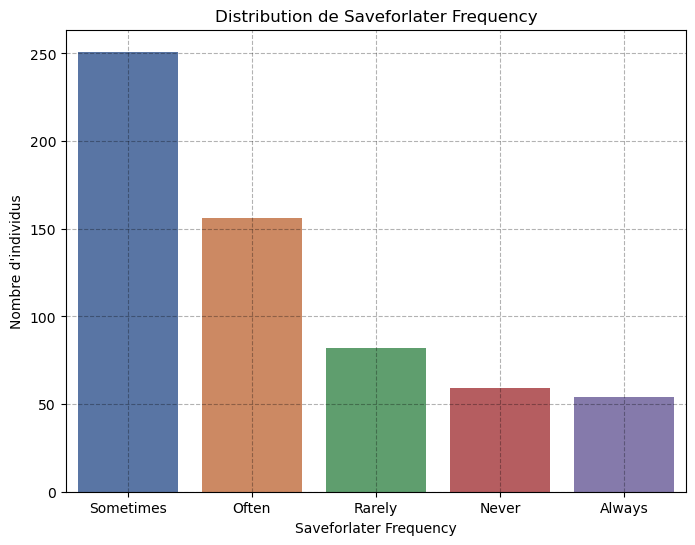

In [411]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_S_F.index,y=data_S_F,palette='deep')
plt.title('Distribution de Saveforlater Frequency')
plt.xlabel('Saveforlater Frequency')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\13 Distribution de Saveforlater Frequency.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres :

- **Parfois** : La majorit√© des clients, repr√©sent√©s par la barre bleue la plus haute, utilisent la fonction "Enregistrer pour plus tard" parfois. Cela pourrait indiquer que ces clients utilisent cette fonction lorsqu'ils trouvent des produits int√©ressants mais ne sont pas encore pr√™ts √† les acheter.
- **Souvent** : Un nombre significatif de clients, repr√©sent√©s par la barre orange, utilisent souvent la fonction "Enregistrer pour plus tard". Ces clients pourraient √™tre ceux qui planifient leurs achats ou qui aiment comparer diff√©rents produits avant de prendre une d√©cision.
- **Rarement** : Un nombre plus petit de clients, repr√©sent√©s par la barre verte, utilisent rarement la fonction "Enregistrer pour plus tard". Ces clients pourraient √™tre ceux qui pr√©f√®rent faire des achats imm√©diats ou qui n'utilisent pas souvent Amazon pour faire du shopping.
- **Jamais** : Un nombre encore plus petit de clients, repr√©sent√©s par la barre violette, n'utilisent jamais la fonction "Enregistrer pour plus tard". Ces clients pourraient √™tre ceux qui ne sont pas familiers avec cette fonction ou qui pr√©f√®rent ne pas l'utiliser pour diverses raisons.
- **Toujours** : Le nombre de clients qui utilisent toujours la fonction "Enregistrer pour plus tard", repr√©sent√©s par la barre rouge, est le plus bas. Ces clients pourraient √™tre ceux qui d√©pendent fortement de cette fonction pour organiser leurs achats potentiels.

La majorit√© des clients utilisent la fonction "Enregistrer pour plus tard" parfois, tandis qu'un nombre significatif de clients l'utilisent souvent. Un nombre plus petit de clients l'utilisent rarement, jamais ou toujours.

L'utilisation de la fonction "Enregistrer pour plus tard" pourrait √™tre li√©e √† l'ajout de produits au panier pendant la navigation (dixi√®me image), √† la finalisation d'un achat apr√®s avoir ajout√© des produits au panier (onzi√®me image), √† l'abandon du panier (douzi√®me image), √† la m√©thode de recherche de produits (septi√®me image), √† l'exploration des r√©sultats de recherche (huiti√®me image) et √† l'importance des avis des clients (neuvi√®me image). Par exemple, les clients qui ajoutent des produits √† leur panier pendant la navigation, qui sont incertains quant √† la finalisation d'un achat apr√®s avoir ajout√© des produits √† leur panier, qui abandonnent parfois un achat pour diverses raisons, qui utilisent des mots-cl√©s pour rechercher des produits, qui explorent plusieurs pages de r√©sultats et qui consid√®rent les avis des clients comme importants pourraient √™tre plus susceptibles d'utiliser la fonction "Enregistrer pour plus tard". Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire. 

**Combien de clients ont d√©j√† laiss√© un avis sur un produit sur Amazon ?**

In [372]:
data_R_L = data['Review_Left'].value_counts()

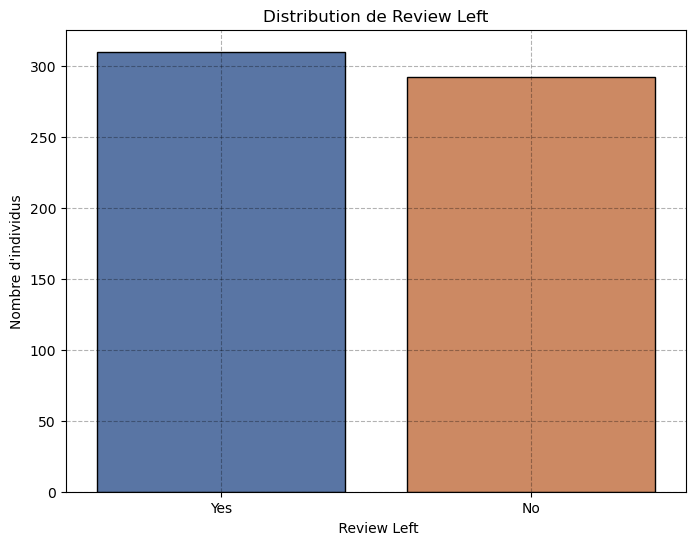

In [412]:

# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_R_L.index,y=data_R_L,palette='deep',edgecolor = 'black')
plt.title('Distribution de Review Left')
plt.xlabel(' Review Left')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',alpha=0.3,color='black')
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\14 Distribution de Review Left.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres:

- **Oui** : La majorit√© des clients, repr√©sent√©s par la barre bleue, ont d√©j√† laiss√© un avis sur un produit sur Amazon. Cela pourrait indiquer que ces clients sont engag√©s et dispos√©s √† partager leurs exp√©riences pour aider d'autres clients.
- **Non** : Un nombre plus petit de clients, repr√©sent√©s par la barre orange, n'ont pas laiss√© d'avis sur un produit sur Amazon. Ces clients pourraient √™tre ceux qui pr√©f√®rent ne pas partager leurs exp√©riences ou qui n'ont pas eu l'occasion de le faire.

La majorit√© des clients ont d√©j√† laiss√© un avis sur un produit sur Amazon, tandis qu'un nombre plus petit de clients ne l'ont pas fait.

Le fait de laisser un avis pourrait √™tre li√© √† l'ajout de produits au panier pendant la navigation (dixi√®me image), √† la finalisation d'un achat apr√®s avoir ajout√© des produits au panier (onzi√®me image), √† l'abandon du panier (douzi√®me image), √† l'utilisation de la fonction "Enregistrer pour plus tard" (treizi√®me image), √† la m√©thode de recherche de produits (septi√®me image), √† l'exploration des r√©sultats de recherche (huiti√®me image) et √† l'importance des avis des clients (neuvi√®me image). Par exemple, les clients qui ajoutent des produits √† leur panier pendant la navigation, qui finalisent un achat apr√®s avoir ajout√© des produits √† leur panier, qui utilisent la fonction "Enregistrer pour plus tard", qui utilisent des mots-cl√©s pour rechercher des produits, qui explorent plusieurs pages de r√©sultats et qui consid√®rent les avis des clients comme importants pourraient √™tre plus susceptibles de laisser un avis sur un produit. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire. 

**Dans quelle mesure les clients font-ils confiance aux avis sur les produits lorsqu'ils effectuent un achat ?**

In [375]:
data_R_R = data['Review_Reliability'].value_counts()

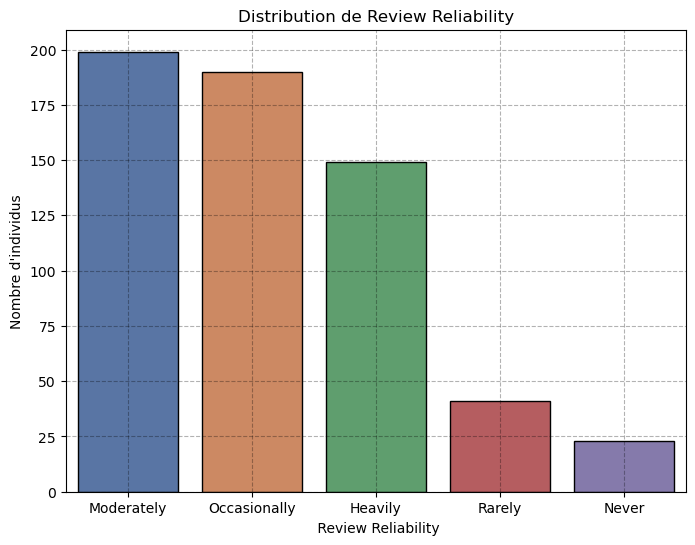

In [413]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_R_R.index,y=data_R_R,palette='deep',edgecolor = 'black')
plt.title('Distribution de Review Reliability')
plt.xlabel(' Review Reliability')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\15 Distribution de Review Reliability.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres :

- **Mod√©r√©ment** : La majorit√© des clients, repr√©sent√©s par la barre la plus haute, font mod√©r√©ment confiance aux avis sur les produits. Cela pourrait indiquer que ces clients prennent en compte les avis sur les produits dans leur processus de prise de d√©cision, mais ne s'y fient pas enti√®rement.
- **Occasionnellement** : Un nombre significatif de clients, repr√©sent√©s par la deuxi√®me barre la plus haute, font occasionnellement confiance aux avis sur les produits. Ces clients pourraient √™tre ceux qui consultent les avis sur les produits de temps en temps, peut-√™tre pour des achats plus importants ou plus co√ªteux.
- **Fortement** : Un nombre plus petit de clients, repr√©sent√©s par la troisi√®me barre la plus haute, font fortement confiance aux avis sur les produits. Ces clients pourraient √™tre ceux qui d√©pendent fortement des avis sur les produits pour prendre leurs d√©cisions d'achat.
- **Rarement** : Un nombre encore plus petit de clients, repr√©sent√©s par la quatri√®me barre la plus haute, font rarement confiance aux avis sur les produits. Ces clients pourraient √™tre ceux qui pr√©f√®rent faire leurs propres recherches ou qui ont des pr√©f√©rences d'achat sp√©cifiques qui ne sont pas influenc√©es par les avis sur les produits.
- **Jamais** : Le nombre de clients qui ne font jamais confiance aux avis sur les produits, repr√©sent√©s par la barre la plus basse, est le plus bas. Ces clients pourraient √™tre ceux qui ne sont pas influenc√©s par les opinions des autres ou qui pr√©f√®rent se fier √† leur propre jugement.

La majorit√© des clients font mod√©r√©ment confiance aux avis sur les produits lorsqu'ils effectuent un achat, tandis qu'un nombre significatif de clients le font occasionnellement. Un nombre plus petit de clients font fortement confiance aux avis sur les produits, et un nombre encore plus petit de clients le font rarement ou jamais.

La confiance dans les avis sur les produits pourrait √™tre li√©e √† l'ajout de produits au panier pendant la navigation (dixi√®me image), √† la finalisation d'un achat apr√®s avoir ajout√© des produits au panier (onzi√®me image), √† l'abandon du panier (douzi√®me image), √† l'utilisation de la fonction "Enregistrer pour plus tard" (treizi√®me image), √† la m√©thode de recherche de produits (septi√®me image), et √† l'exploration des r√©sultats de recherche (huiti√®me image). Par exemple, les clients qui ajoutent des produits √† leur panier pendant la navigation, qui finalisent un achat apr√®s avoir ajout√© des produits √† leur panier, qui utilisent la fonction "Enregistrer pour plus tard", qui utilisent des mots-cl√©s pour rechercher des produits, et qui explorent plusieurs pages de r√©sultats pourraient √™tre plus susceptibles de faire confiance aux avis sur les produits. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire.

**Les clients trouvent-ils des informations utiles dans les avis d'autres clients ?**

In [377]:
data_R_H = data['Review_Helpfulness'].value_counts()

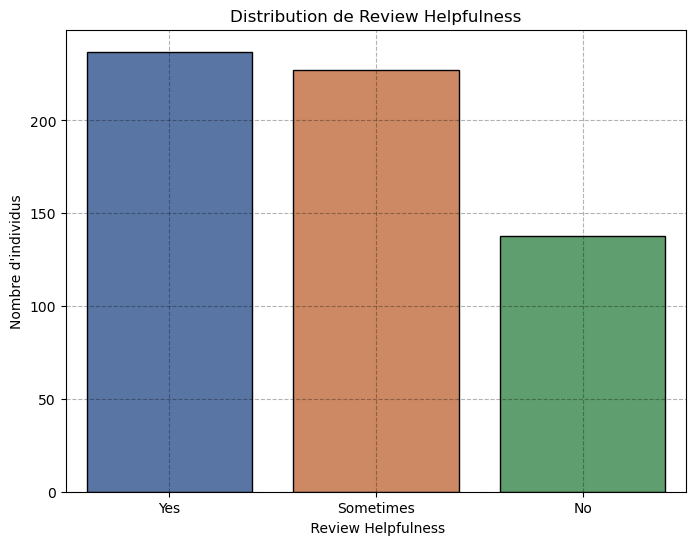

In [414]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_R_H.index,y=data_R_H,palette='deep',edgecolor = 'black')
plt.title('Distribution de Review Helpfulness')
plt.xlabel(' Review Helpfulness')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\16 Distribution de Review Helpfulness.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres :

- **Oui** : La majorit√© des clients, repr√©sent√©s par la barre bleue la plus haute, trouvent des informations utiles dans les avis d'autres clients. Cela pourrait indiquer que ces clients appr√©cient les avis d'autres clients pour obtenir des informations sur la qualit√© du produit, l'exp√©rience d'utilisation, etc.
- **Parfois** : Un nombre significatif de clients, repr√©sent√©s par la barre orange, trouvent parfois des informations utiles dans les avis d'autres clients. Ces clients pourraient √™tre ceux qui consultent les avis sur les produits de temps en temps, peut-√™tre pour des achats plus importants ou plus co√ªteux.
- **Non** : Un nombre plus petit de clients, repr√©sent√©s par la barre verte, ne trouvent pas d'informations utiles dans les avis d'autres clients. Ces clients pourraient √™tre ceux qui pr√©f√®rent faire leurs propres recherches ou qui ont des pr√©f√©rences d'achat sp√©cifiques qui ne sont pas influenc√©es par les avis sur les produits.

La majorit√© des clients trouvent des informations utiles dans les avis d'autres clients lorsqu'ils effectuent un achat, tandis qu'un nombre significatif de clients le trouvent parfois utile. Un nombre plus petit de clients ne trouvent pas d'informations utiles dans les avis d'autres clients.

L'utilit√© des avis sur les produits pourrait √™tre li√©e √† l'ajout de produits au panier pendant la navigation (dixi√®me image), √† la finalisation d'un achat apr√®s avoir ajout√© des produits au panier (onzi√®me image), √† l'abandon du panier (douzi√®me image), √† l'utilisation de la fonction "Enregistrer pour plus tard" (treizi√®me image), √† la m√©thode de recherche de produits (septi√®me image), et √† l'exploration des r√©sultats de recherche (huiti√®me image). Par exemple, les clients qui ajoutent des produits √† leur panier pendant la navigation, qui finalisent un achat apr√®s avoir ajout√© des produits √† leur panier, qui utilisent la fonction "Enregistrer pour plus tard", qui utilisent des mots-cl√©s pour rechercher des produits, et qui explorent plusieurs pages de r√©sultats pourraient √™tre plus susceptibles de trouver des informations utiles dans les avis sur les produits. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire. üòä

**√Ä quelle fr√©quence les clients re√ßoivent-ils des recommandations de produits personnalis√©es d'Amazon ?**

In [379]:
daad_P_R_F = data['Personalized_Recommendation_Frequency'].value_counts()

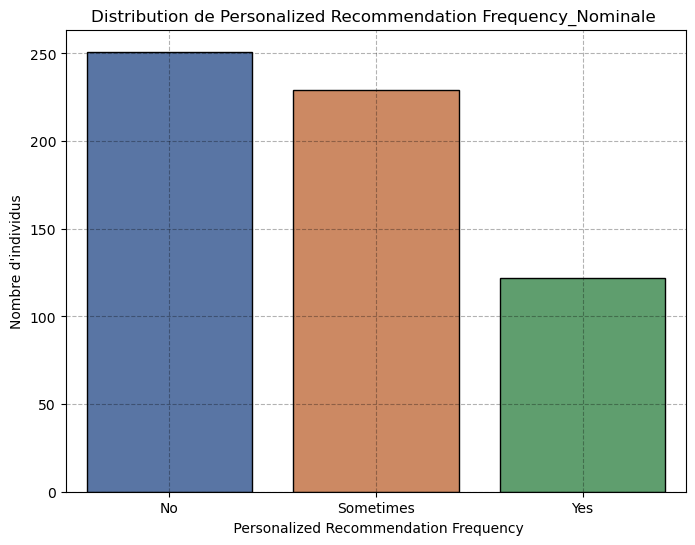

In [629]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=daad_P_R_F.index,y=daad_P_R_F,palette='deep',edgecolor = 'black')
plt.title('Distribution de Personalized Recommendation Frequency_Nominale ')
plt.xlabel(' Personalized Recommendation Frequency')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\17 Distribution de Personalized Recommendation Frequency.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

**D‚Äôapr√®s les donn√©es pr√©sent√©es :**

* 251 clients ne re√ßoivent pas de recommandations de produits personnalis√©es.
* 229 clients en re√ßoivent parfois.
* 122 clients en re√ßoivent toujours.

Il semble donc que la majorit√© des clients ne re√ßoivent pas de recommandations de produits personnalis√©es d‚ÄôAmazon, tandis qu‚Äôune part significative des clients en re√ßoit parfois. Un nombre plus restreint de clients en re√ßoit toujours.

**Comment les clients √©valuent-ils la pertinence et la pr√©cision des recommandations qu'ils re√ßoivent ?**

In [384]:
data_R_A = data['Rating_Accuracy '].value_counts()

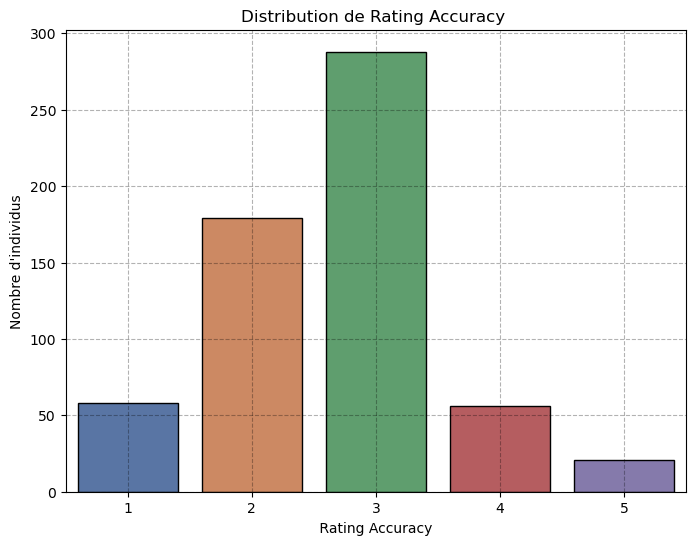

In [416]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_R_A.index,y=data_R_A,palette='deep',edgecolor = 'black')
plt.title('Distribution de Rating Accuracy ')
plt.xlabel(' Rating Accuracy ')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\19 Distribution de Rating Accuracy.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s le graphique √† barres :

- **3 sur 5** : La majorit√© des clients, repr√©sent√©s par la barre la plus haute, √©valuent la pertinence et la pr√©cision des recommandations qu'ils re√ßoivent comme √©tant de 3 sur 5. Cela pourrait indiquer que ces clients trouvent les recommandations mod√©r√©ment pertinentes et pr√©cises.
- **2 sur 5** : Un nombre significatif de clients, repr√©sent√©s par la deuxi√®me barre la plus haute, √©valuent la pertinence et la pr√©cision des recommandations qu'ils re√ßoivent comme √©tant de 2 sur 5. Ces clients pourraient √™tre ceux qui trouvent les recommandations relativement peu pertinentes ou pr√©cises.
- **1 sur 5** : Un nombre plus petit de clients, repr√©sent√©s par la troisi√®me barre la plus haute, √©valuent la pertinence et la pr√©cision des recommandations qu'ils re√ßoivent comme √©tant de 1 sur 5. Ces clients pourraient √™tre ceux qui ne trouvent pas les recommandations pertinentes ou pr√©cises.
- **4 sur 5** : Un nombre encore plus petit de clients, repr√©sent√©s par la quatri√®me barre la plus haute, √©valuent la pertinence et la pr√©cision des recommandations qu'ils re√ßoivent comme √©tant de 4 sur 5. Ces clients pourraient √™tre ceux qui trouvent les recommandations tr√®s pertinentes et pr√©cises.
- **5 sur 5** : Le nombre de clients qui √©valuent la pertinence et la pr√©cision des recommandations qu'ils re√ßoivent comme √©tant de 5 sur 5, repr√©sent√©s par la barre la plus basse, est le plus bas. Ces clients pourraient √™tre ceux qui trouvent les recommandations extr√™mement pertinentes et pr√©cises.

La majorit√© des clients √©valuent la pertinence et la pr√©cision des recommandations qu'ils re√ßoivent comme √©tant mod√©r√©es, tandis qu'un nombre significatif de clients les √©valuent comme relativement faibles. Un nombre plus petit de clients les √©valuent comme √©tant faibles, tr√®s √©lev√©es ou extr√™mement √©lev√©es.

L'√©valuation de la pertinence et de la pr√©cision des recommandations pourrait √™tre li√©e √† la r√©ception de recommandations de produits personnalis√©es (dix-septi√®me image), √† l'ajout de produits au panier pendant la navigation (dixi√®me image), √† la finalisation d'un achat apr√®s avoir ajout√© des produits au panier (onzi√®me image), √† l'abandon du panier (douzi√®me image), √† l'utilisation de la fonction "Enregistrer pour plus tard" (treizi√®me image), √† la m√©thode de recherche de produits (septi√®me image), √† l'exploration des r√©sultats de recherche (huiti√®me image), et √† l'importance des avis des clients (neuvi√®me image). Par exemple, les clients qui re√ßoivent des recommandations de produits personnalis√©es, qui ajoutent des produits √† leur panier pendant la navigation, qui finalisent un achat apr√®s avoir ajout√© des produits √† leur panier, qui utilisent la fonction "Enregistrer pour plus tard", qui utilisent des mots-cl√©s pour rechercher des produits, qui explorent plusieurs pages de r√©sultats et qui consid√®rent les avis des clients comme importants pourraient √™tre plus susceptibles d'√©valuer la pertinence et la pr√©cision des recommandations comme √©tant √©lev√©es. Cependant, pour confirmer ces relations, une analyse plus approfondie serait n√©cessaire.

**Dans quelle mesure les clients sont-ils satisfaits de leur exp√©rience d'achat globale sur Amazon ?**

In [386]:
data_S_S = data['Shopping_Satisfaction'].value_counts()

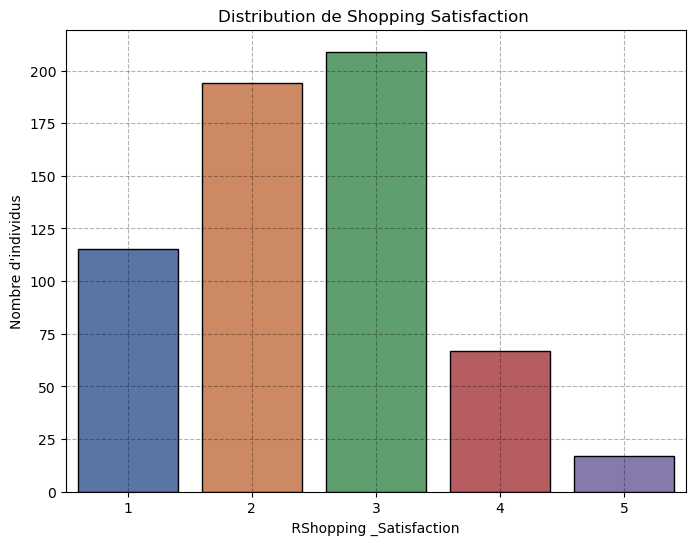

In [417]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_S_S.index,y=data_S_S,palette='deep',edgecolor = 'black')
plt.title('Distribution de Shopping Satisfaction ')
plt.xlabel(' RShopping _Satisfaction ')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\20 Distribution de Shopping _Satisfaction.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

D'apr√®s les donn√©es fournies:

- **209 clients** ont donn√© une note de **3** sur 5.
- **194 clients** ont donn√© une note de **2** sur 5.
- **115 clients** ont donn√© une note de **1** sur 5.
- **67 clients** ont donn√© une note de **4** sur 5.
- **17 clients** ont donn√© une note de **5** sur 5.

Cela sugg√®re que la majorit√© des clients ont une exp√©rience d'achat moyennement satisfaisante sur Amazon, avec une note de 3 sur 5. Cependant, il y a aussi une proportion significative de clients qui ont une exp√©rience moins satisfaisante, avec une note de 2 ou 1. Seuls quelques clients ont donn√© une note de 4 ou 5, indiquant une exp√©rience d'achat tr√®s satisfaisante. Il est important de noter que ces r√©sultats peuvent varier en fonction de divers facteurs tels que la s√©lection de produits, le service client, les d√©lais de livraison, etc.

**Quels aspects des services d'Amazon sont les plus appr√©ci√©s par les clients ?**

In [388]:
data_S_App = data['Service_Appreciation'].value_counts()

**Remarque** : Il semble y avoir quelques probl√®mes de nettoyage des donn√©es dans la colonne "Service_Appr√©ciation". Vous avez des doublons, des espaces, et un point (".") qui appara√Æt √©galement.

In [389]:
# voir le contenu de ce colonne 
data['Service_Appreciation'].unique()

array(['Competitive prices', 'Wide product selection',
       'User-friendly website/app interface', '.', 'Customer service ',
       'Product recommendations', 'Customer service', 'Quick delivery',
       'All the above'], dtype=object)

In [390]:
# Nettoyer la colonne 'Service_Appreciation'
data['Service_Appreciation'] = data['Service_Appreciation'].str.strip()  # Supprimer les espaces en d√©but et en fin de cha√Æne
data['Service_Appreciation'] = data['Service_Appreciation'].replace({'Customer service ': 'Customer service'})  # Corriger la valeur en doublon
data = data[data['Service_Appreciation'] != '.']

# Afficher les cat√©gories uniques et leurs comptes mis √† jour
service_appreciation_counts = data['Service_Appreciation'].value_counts()
print(service_appreciation_counts)


Service_Appreciation
Product recommendations                185
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
Customer service                         2
Quick delivery                           1
All the above                            1
Name: count, dtype: int64


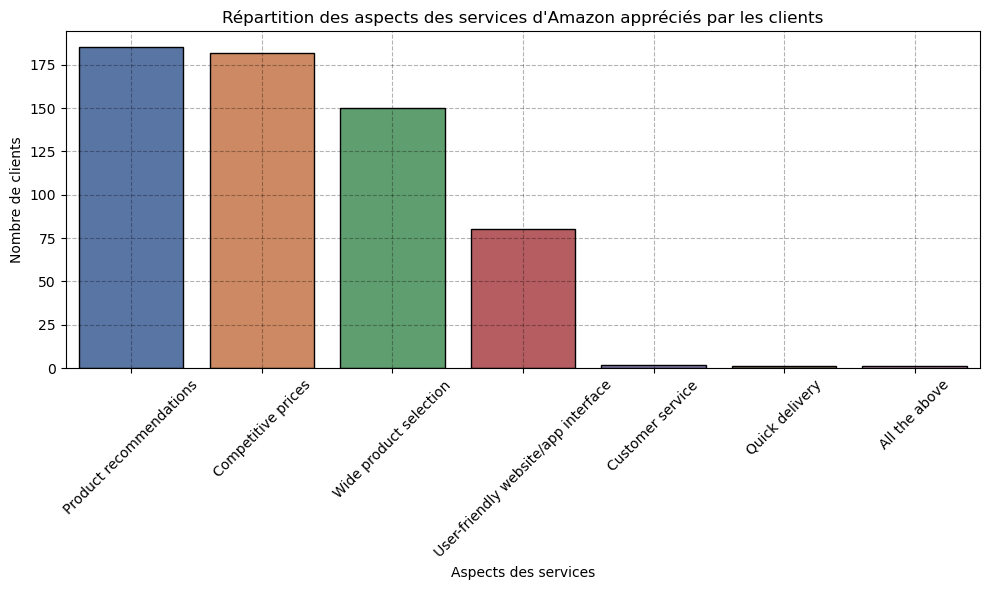

In [418]:
# Comptez le nombre de r√©ponses par cat√©gorie
service_counts = data['Service_Appreciation'].value_counts()

# Cr√©ez un graphique √† barres
plt.figure(figsize=(10, 6))
sns.barplot(x=service_appreciation_counts.index,y=service_appreciation_counts,palette='deep',edgecolor = 'black')
plt.title("R√©partition des aspects des services d'Amazon appr√©ci√©s par les clients")
plt.xlabel("Aspects des services")
plt.ylabel("Nombre de clients")
plt.grid(True,linestyle='--',color='black',alpha=0.3)
plt.xticks(rotation = 45)
# Affichez le graphique
plt.tight_layout()
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\21 R√©partition des aspects des services d\'Amazon appr√©ci√©s par les clients.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()


**D‚Äôapr√®s les donn√©es pr√©sent√©es:**

* 185 clients appr√©cient les recommandations de produits.
* 182 clients appr√©cient les prix comp√©titifs.
* 150 clients appr√©cient la large s√©lection de produits.
* 80 clients appr√©cient l‚Äôinterface conviviale du site web/de l‚Äôapplication.
* 2 clients appr√©cient le service client.
* 1 client appr√©cie la livraison rapide.
* 1 client appr√©cie tous les aspects mentionn√©s ci-dessus.

Il semble donc que les recommandations de produits et les prix comp√©titifs sont les aspects les plus appr√©ci√©s des services d‚ÄôAmazon. Cependant, une part significative des clients appr√©cie √©galement la large s√©lection de produits et l‚Äôinterface conviviale du site web/de l‚Äôapplication.* 

**Y a-t-il des domaines o√π les clients pensent qu'Amazon pourrait s'am√©liorer ?**

In [393]:
data['Improvement_Areas'].value_counts()

Improvement_Areas
Customer service responsiveness                                                   217
Product quality and accuracy                                                      159
Reducing packaging waste                                                          133
Shipping speed and reliability                                                     79
Quality of product is very poor according to the big offers                         1
I don't have any problem with Amazon                                                1
User interface of app                                                               1
Irrelevant product suggestions                                                      1
User interface                                                                      1
I have no problem with Amazon yet. But others tell me about the refund issues       1
UI                                                                                  1
Scrolling option would be much bette

**Remarque :** Pour la priorisation des probl√®mes, je recommanderais de classer les domaines d'am√©lioration en fonction du nombre de r√©ponses et de leur impact potentiel sur la satisfaction client. Dans ce cas, "Customer service responsiveness," "Product quality and accuracy," "Reducing packaging waste," et "Shipping speed and reliability" semblent √™tre les domaines les plus importants.

In [394]:
# S√©lectionnez les cat√©gories d'int√©r√™t
categories_of_interest = [
    "Customer service responsiveness",
    "Product quality and accuracy",
    "Reducing packaging waste",
    "Shipping speed and reliability"
]

# Filtrez le DataFrame pour inclure uniquement les lignes correspondant √† ces cat√©gories
filtered_data = data[data['Improvement_Areas'].isin(categories_of_interest)]

# Obtenez le compte des cat√©gories sp√©cifiques
counts = filtered_data['Improvement_Areas'].value_counts()

# Affichez le r√©sultat
print(counts)


Improvement_Areas
Customer service responsiveness    217
Product quality and accuracy       159
Reducing packaging waste           133
Shipping speed and reliability      79
Name: count, dtype: int64


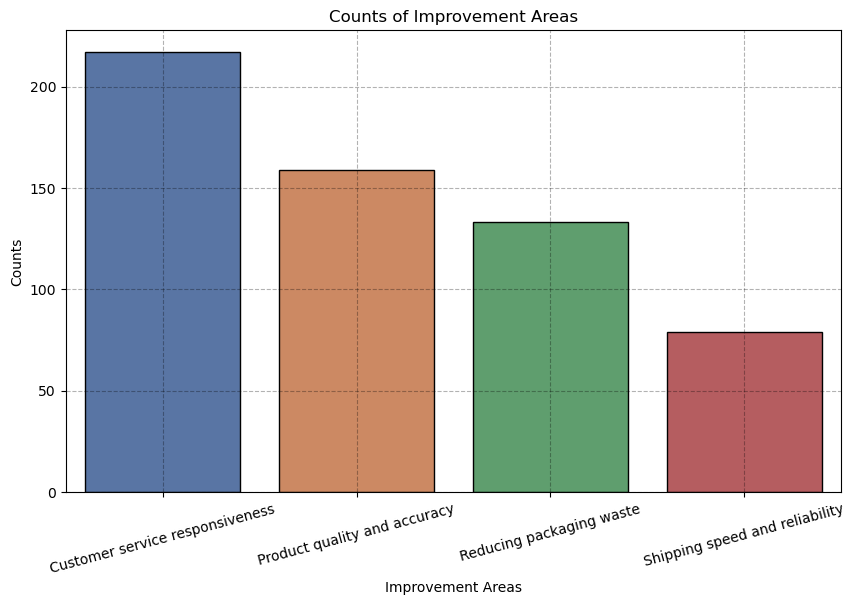

In [395]:
import matplotlib.pyplot as plt

# Create a bar plot for the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index,y=counts,palette='deep',edgecolor = 'black')
plt.title('Counts of Improvement Areas')
plt.xlabel('Improvement Areas')
plt.ylabel('Counts')
plt.xticks(rotation=15)  # Rotate the x-axis labels for better visibility
plt.grid(True,linestyle='--',color='black',alpha=0.3)

path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\Counts of Improvement Areas.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
# Show the plot
plt.show()


# test d'ind√©pendance entre les variables quantitatives : 

In [466]:
data.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'Grouped_Categories'],
      dtype='object')

**formulation des hypoth√©ses :** 

- **Hypoth√®se nulle H0 :** Il n'y a pas de relation statistiquement significative entre les deux variables cat√©gorielles. En d'autres termes, les variables sont ind√©pendantes.

- **Hypoth√®se alternative H1 :** Il existe une relation statistiquement significative entre les deux variables cat√©gorielles. Les variables ne sont pas ind√©pendantes.



In [467]:
categorical_cols = ['Gender', 'Purchase_Frequency',
                     'Purchase_Categories', 'Personalized_Recommendation_Frequency',
                     'Browsing_Frequency', 'Product_Search_Method',
                     'Search_Result_Exploration', 'Customer_Reviews_Importance',
                     'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
                     'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
                     'Review_Reliability', 'Review_Helpfulness',
                     'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
                     'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
                     'Improvement_Areas', 'Grouped_Categories']

# Set a p-value threshold for feature selection
p_value_threshold = 0.05

# Perform the Chi-squared test for independence for all pairs of variables
selected_pairs = []
for pair in combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between {pair[0]} and {pair[1]}:")
    print(f"Chi-square statistic: {chi2}, p-value: {p}")

    if p < p_value_threshold:
        selected_pairs.append(pair)

# Print the automatically selected pairs
print("Automatically selected pairs based on p-value threshold:")
print(selected_pairs)


Chi-square test between Gender and Purchase_Frequency:
Chi-square statistic: 32.906280984135776, p-value: 0.001001152680931906
Chi-square test between Gender and Purchase_Categories:
Chi-square statistic: 151.0048545299717, p-value: 1.0199333236521182e-05
Chi-square test between Gender and Personalized_Recommendation_Frequency:
Chi-square statistic: 15.49313411337437, p-value: 0.016749198402039745
Chi-square test between Gender and Browsing_Frequency:
Chi-square statistic: 23.317014556950525, p-value: 0.0055222700169171935
Chi-square test between Gender and Product_Search_Method:
Chi-square statistic: 25.424723734549353, p-value: 0.002535580766099553
Chi-square test between Gender and Search_Result_Exploration:
Chi-square statistic: 6.918431446573709, p-value: 0.07454358649334304
Chi-square test between Gender and Customer_Reviews_Importance:
Chi-square statistic: 35.98276129766054, p-value: 0.00032606696790320617
Chi-square test between Gender and Add_to_Cart_Browsing:
Chi-square stat

Chi-square test between Purchase_Categories and Grouped_Categories:
Chi-square statistic: 104.48790725871359, p-value: 0.06446659310188657
Chi-square test between Personalized_Recommendation_Frequency and Browsing_Frequency:
Chi-square statistic: 46.68856902798402, p-value: 2.15874963202873e-08
Chi-square test between Personalized_Recommendation_Frequency and Product_Search_Method:
Chi-square statistic: 42.15529030311776, p-value: 1.7134072907562392e-07
Chi-square test between Personalized_Recommendation_Frequency and Search_Result_Exploration:
Chi-square statistic: 10.89279020917146, p-value: 0.004311820369226899
Chi-square test between Personalized_Recommendation_Frequency and Customer_Reviews_Importance:
Chi-square statistic: 33.783178311443926, p-value: 4.447059448008885e-05
Chi-square test between Personalized_Recommendation_Frequency and Add_to_Cart_Browsing:
Chi-square statistic: 84.45761781220787, p-value: 1.977127078570383e-17
Chi-square test between Personalized_Recommendatio

Chi-square test between Search_Result_Exploration and Grouped_Categories:
Chi-square statistic: 8.607701875981899, p-value: 0.034988062036111815
Chi-square test between Customer_Reviews_Importance and Add_to_Cart_Browsing:
Chi-square statistic: 156.70006088702814, p-value: 7.829116882905331e-30
Chi-square test between Customer_Reviews_Importance and Cart_Completion_Frequency:
Chi-square statistic: 75.06448415715971, p-value: 1.2734534488895316e-09
Chi-square test between Customer_Reviews_Importance and Cart_Abandonment_Factors:
Chi-square statistic: 38.737320146286095, p-value: 0.00011624947401168799
Chi-square test between Customer_Reviews_Importance and Saveforlater_Frequency:
Chi-square statistic: 83.6838018680602, p-value: 3.583519083673104e-11
Chi-square test between Customer_Reviews_Importance and Review_Left:
Chi-square statistic: 1.335167553488658, p-value: 0.8553812198279427
Chi-square test between Customer_Reviews_Importance and Review_Reliability:
Chi-square statistic: 228.3

Chi-square test between Review_Helpfulness and Rating_Accuracy :
Chi-square statistic: 33.930747859789754, p-value: 4.18172780080023e-05
Chi-square test between Review_Helpfulness and Shopping_Satisfaction:
Chi-square statistic: 40.5219857341354, p-value: 2.560498471516945e-06
Chi-square test between Review_Helpfulness and Service_Appreciation:
Chi-square statistic: 60.92540502348256, p-value: 1.5299486663439085e-08
Chi-square test between Review_Helpfulness and Improvement_Areas:
Chi-square statistic: 47.00668821257219, p-value: 0.04234768825050309
Chi-square test between Review_Helpfulness and Grouped_Categories:
Chi-square statistic: 12.721499067738483, p-value: 0.04767802583897619
Chi-square test between Personalized_Recommendation_Frequency  and Recommendation_Helpfulness:
Chi-square statistic: 65.43555609357313, p-value: 3.957694101052292e-11
Chi-square test between Personalized_Recommendation_Frequency  and Rating_Accuracy :
Chi-square statistic: 313.1565668283144, p-value: 4.77

 -**0 :** Cela pourrait indiquer que le test de chi-carr√© n'a pas rejet√© l'hypoth√®se nulle H0, ce qui sugg√®re que les deux variables correspondantes sont ind√©pendantes (p-value ‚â• 0.05). 
 - **1 :** Cela pourrait indiquer que le test de chi-carr√© a rejet√© l'hypoth√®se nulle H0, sugg√©rant ainsi qu'il y a une relation statistiquement significative entre les deux variables correspondantes (p-value < 0.05).


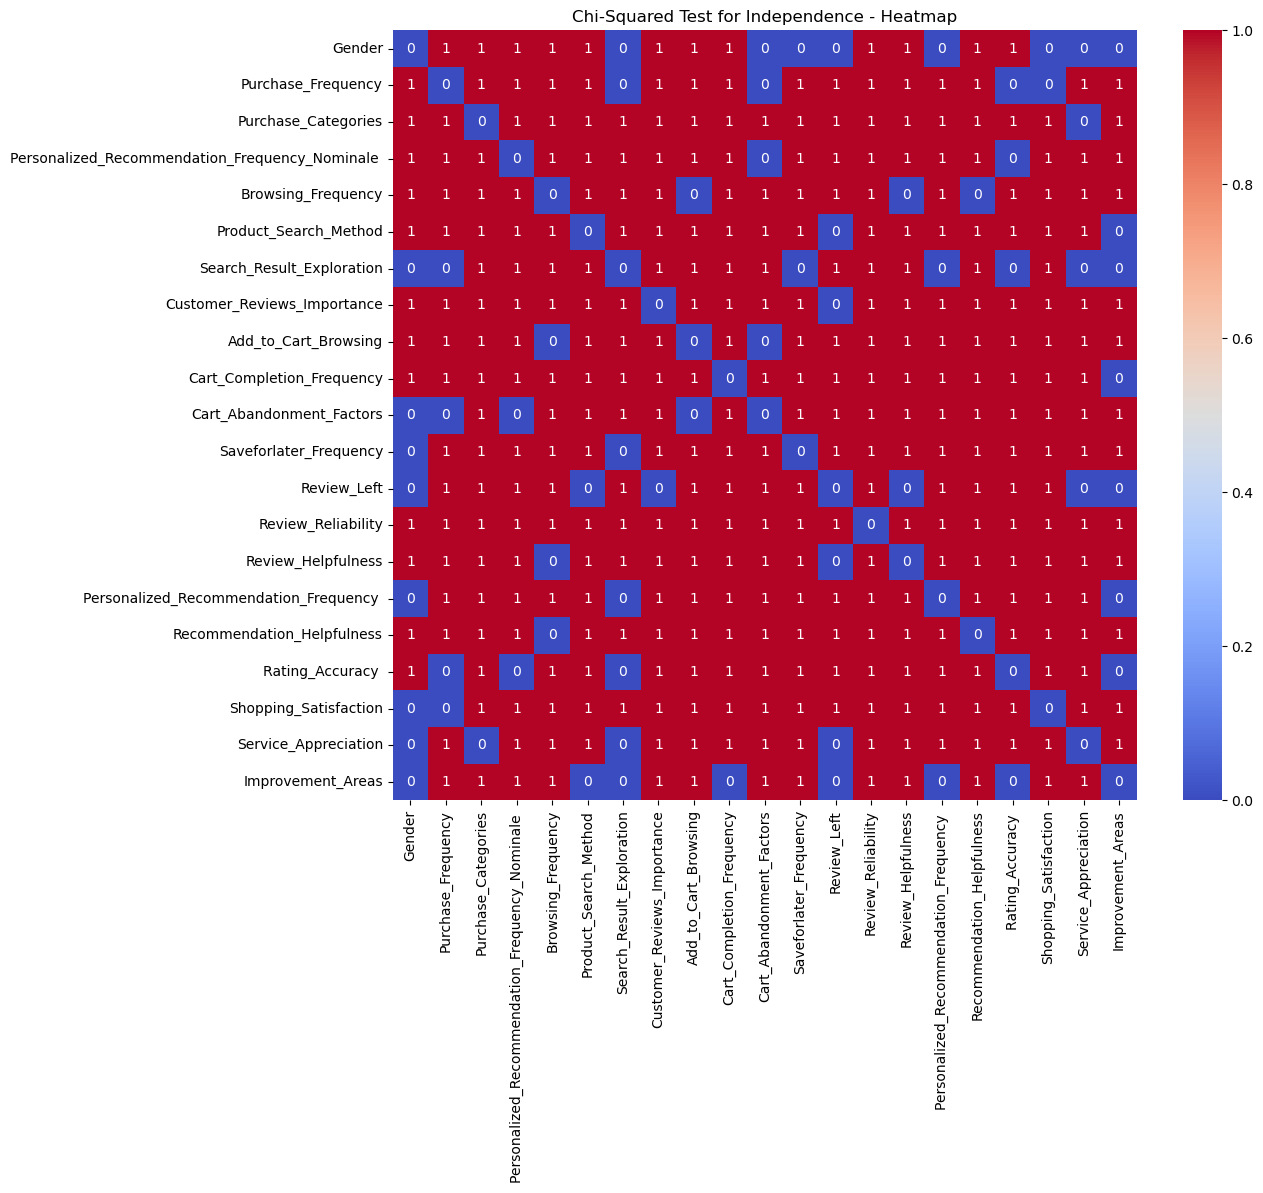

In [509]:
categorical_cols =  ['Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Personalized_Recommendation_Frequency_Nominale ', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Personalized_Recommendation_Frequency ',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas']
# Set a p-value threshold for feature selection
p_value_threshold = 0.05

# Create a DataFrame to store the p-values
p_values_df = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Perform the Chi-squared test for independence for all pairs of variables
for pair in combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values_df.loc[pair[0], pair[1]] = p
    p_values_df.loc[pair[1], pair[0]] = p

# Convert p-values to a binary significance matrix
significance_matrix = p_values_df < p_value_threshold

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(significance_matrix, annot=True, cmap='coolwarm', fmt='d')
print(' -**0 :** Cela pourrait indiquer que le test de chi-carr√© n\'a pas rejet√© l\'hypoth√®se nulle H0, ce qui sugg√®re que les deux variables correspondantes sont ind√©pendantes (p-value ‚â• 0.05).','\n'

,'- **1 :** Cela pourrait indiquer que le test de chi-carr√© a rejet√© l\'hypoth√®se nulle H0, sugg√©rant ainsi qu\'il y a une relation statistiquement significative entre les deux variables correspondantes (p-value < 0.05).')
plt.title('Chi-Squared Test for Independence - Heatmap')
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\heatmapChi-squared test for independence for all pairs of variables.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()


In [535]:
# on va cr√©e une nouvelle data dans la quelle on va encoder les variables : 
data_encoding = data



In [536]:
data_encoding.drop(['Timestamp'],axis=1,inplace=True) # on a pas besoin de Timestamp 

In [537]:
data_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   age                                              602 non-null    int64 
 1   Gender                                           602 non-null    object
 2   Purchase_Frequency                               602 non-null    object
 3   Purchase_Categories                              602 non-null    object
 4   Personalized_Recommendation_Frequency_Nominale   602 non-null    object
 5   Browsing_Frequency                               602 non-null    object
 6   Product_Search_Method                            600 non-null    object
 7   Search_Result_Exploration                        602 non-null    object
 8   Customer_Reviews_Importance                      602 non-null    int64 
 9   Add_to_Cart_Browsing                       

## Extraction des valeurs uniques pour chaque variable : 


In [539]:
# Extract unique values for each object variable
unique_values = {}
for column in data_encoding.columns:
    unique_values[column] = data_encoding[column].unique()

for column, values in unique_values.items():
    print(f"Unique values for {column}:\n{values}\n")

Unique values for age:
[23 24 22 21 20 25 16 64 29 19 26 32 30 40 36 31 47 54 58 53 28 55 62 27
 34 44 38 35 42 37 45 50 63 46 33 60 18 17 57 41 39 48 49 15 43 52  3 67
 56 12]

Unique values for Gender:
['Female' 'Prefer not to say' 'Male' 'Others']

Unique values for Purchase_Frequency:
['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']

Unique values for Purchase_Categories:
['Beauty and Personal Care' 'Clothing and Fashion'
 'Groceries and Gourmet Food;Clothing and Fashion'
 'Beauty and Personal Care;Clothing and Fashion;others'
 'Beauty and Personal Care;Clothing and Fashion'
 'Beauty and Personal Care;Clothing and Fashion;Home and Kitchen'
 'Clothing and Fashion;Home and Kitchen' 'others'
 'Clothing and Fashion;others' 'Beauty and Personal Care;Home and Kitchen'
 'Groceries and Gourmet Food'
 'Groceries and Gourmet Food;Clothing and Fashion;others'
 'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and

### Gestion des Variables dans l'Analyse de Donn√©es

In [545]:
quantitative_variable = ['age']



# Nominal variables
qualitative_nominal_vars = [
    'Gender',
    'Product_Search_Method',
    'Search_Result_Exploration',
    'Add_to_Cart_Browsing',
    'Personalized_Recommendation_Frequency_Nominale ',
    'Cart_Abandonment_Factors',
    'Review_Left',
    'Review_Helpfulness',
    'Recommendation_Helpfulness',
    'Purchase_Categories',
     'Service_Appreciation',
    'Improvement_Areas'
]


# Ordinal variables
qualitative_ordinal_vars = [
    'Personalized_Recommendation_Frequency ',
    'Purchase_Frequency',
    'Customer_Reviews_Importance',
    'Browsing_Frequency',
    'Cart_Completion_Frequency',
    'Saveforlater_Frequency',
    'Review_Reliability',
    'Rating_Accuracy ',
     'Shopping_Satisfaction'
]


### Encodage one-hot des variables nominales : 

In [542]:

# One-hot encoding for nominal variables
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(data_encoding[qualitative_nominal_vars].fillna('Missing'))
data_encoding_one_hot = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(qualitative_nominal_vars))
data_encoding = pd.concat([data_encoding, data_encoding_one_hot], axis=1)

# Update the DataFrame after one-hot encoding
data_encoding = data_encoding.drop(columns=qualitative_nominal_vars)

data_encoding

age      Purchase_Frequency    Browsing_Frequency  \
0     23       Few times a month      Few times a week   
1     23            Once a month     Few times a month   
2     24       Few times a month     Few times a month   
3     24            Once a month     Few times a month   
4     22  Less than once a month     Few times a month   
..   ...                     ...                   ...   
597   23             Once a week      Few times a week   
598   23             Once a week      Few times a week   
599   23            Once a month      Few times a week   
600   23       Few times a month     Few times a month   
601   23             Once a week  Multiple times a day   

     Customer_Reviews_Importance Cart_Completion_Frequency  \
0                              1                 Sometimes   
1                              1                     Often   
2                              2                 Sometimes   
3                              5                 Sometimes   
4                              1                 Sometimes   
..                           ...                       ...   
597                            4                 Sometimes   
598                            3                 Sometimes   
599                            3                 Sometimes   
600                            1                     Often   
601                            3                     Often   

    Saveforlater_Frequency Review_Reliability  \
0                Sometimes       Occasionally   
1                   Rarely            Heavily   
2                   Rarely       Occasionally   
3                Sometimes            Heavily   
4                   Rarely            Heavily   
..                     ...                ...   
597              Sometimes         Moderately   
598              Sometimes            Heavily   
599              Sometimes       Occasionally   
600              Sometimes            Heavily   
601              Sometimes         Moderately   

     Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                                         2                 1   
1                                         2                 3   
2                                         4                 3   
3                                         3                 3   
4                                         4                 2   
..                                      ...               ...   
597                                       3                 3   
598                                       3                 3   
599                                       3                 2   
600                                       2                 2   
601                                       3                 3   

     Shopping_Satisfaction  ...  Improvement_Areas_Nothing  \
0                        1  ...                        0.0   
1                        2  ...                        0.0   
2                        3  ...                        0.0   
3                        4  ...                        0.0   
4                        2  ...                        0.0   
..                     ...  ...                        ...   
597                      4  ...                        0.0   
598                      3  ...                        0.0   
599                      3  ...                        0.0   
600                      2  ...                        0.0   
601                      3  ...                        0.0   

     Improvement_Areas_Product quality and accuracy  \
0                                               0.0   
1                                               0.0   
2                                               1.0   
3                                               1.0   
4                                               1.0   
..                                              ...   
597                                             0.0   
598     

### Encodage Ordinal des Variables Qualitatives :

In [549]:
for column in qualitative_ordinal_vars:
    unique_values = data_encoding[column].unique()
    print(f"Unique values for {column}:", unique_values)


Unique values for Personalized_Recommendation_Frequency : [2 4 3 5 1]
Unique values for Purchase_Frequency: ['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']
Unique values for Customer_Reviews_Importance: [1 2 5 3 4]
Unique values for Browsing_Frequency: ['Few times a week' 'Few times a month' 'Rarely' 'Multiple times a day']
Unique values for Cart_Completion_Frequency: ['Sometimes' 'Often' 'Rarely' 'Never' 'Always']
Unique values for Saveforlater_Frequency: ['Sometimes' 'Rarely' 'Never' 'Often' 'Always']
Unique values for Review_Reliability: ['Occasionally' 'Heavily' 'Moderately' 'Never' 'Rarely']
Unique values for Rating_Accuracy : [1 3 2 5 4]
Unique values for Shopping_Satisfaction: [1 2 3 4 5]


In [553]:
from sklearn.preprocessing import OrdinalEncoder

# Define a dictionary with unique values for each ordinal variable
ordinal_categories = {
    'Personalized_Recommendation_Frequency ': [1, 2, 3, 4, 5],
    'Purchase_Frequency': ['Less than once a month', 'Few times a month', 'Few times a week', 'Multiple times a week', 'Once a month', 'Once a week'],
    'Customer_Reviews_Importance': [1, 2, 3, 4, 5],
    'Browsing_Frequency': ['Rarely', 'Few times a month', 'Few times a week', 'Multiple times a day'],
    'Cart_Completion_Frequency': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    'Saveforlater_Frequency': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    'Review_Reliability': ['Never', 'Rarely', 'Occasionally', 'Moderately', 'Heavily'],
    'Rating_Accuracy ': [1, 2, 3, 4, 5],
    'Shopping_Satisfaction': [1, 2, 3, 4, 5]
}

# Apply OrdinalEncoder to each ordinal variable
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories[var] for var in qualitative_ordinal_vars])
data_encoding[qualitative_ordinal_vars] = ordinal_encoder.fit_transform(data_encoding[qualitative_ordinal_vars].fillna('Missing'))


In [182]:
data_encoding.columns

Index(['age', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Customer_Reviews_Importance', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Purchase_Frequency_encoding', 'Gender_Male',
       'Gender_Others', 'Gender_Prefer not to say',
       'Product_Search_Method_Keyword', 'Product_Search_Method_Missing',
       'Product_Search_Method_categories', 'Product_Search_Method_others',
       'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No',
       'Add_to_Cart_Browsing_Yes',
       'Cart_Abandonment_Factors_Found a better price elsewhere',
       'Cart_Abandonment_Factors_High shipping costs',
       'Cart_Abandonment_Factors_others', 'Review_Left_Yes',
       'Review_Helpfulness_Sometimes', 'Review_Helpfulness_Yes',
       'Recommendation_Helpfulness_Sometimes',
       'Recommendation_Helpfulness_Yes'],
     

### Analyse de Corr√©lation Point-Biserial entre 'Review_Left_Yes' et la Variable Quantitative 'age' : 

Lors de la r√©alisation d'une analyse de corr√©lation point-biserial entre une variable binaire (cat√©gorique) et une variable continue, les hypoth√®ses nulle H0 et alternative H1 peuvent √™tre formul√©es comme suit :

**Hypoth√®se Nulle H0 :**
Il n'existe aucune corr√©lation significative entre la variable binaire et la variable continue dans la population.

**Hypoth√®se Alternative H1 :**
Il existe une corr√©lation significative entre la variable binaire et la variable continue dans la population.

In [561]:
import pandas as pd
from scipy.stats import pointbiserialr

# Assuming 'data_encoding' is your DataFrame
X = data_encoding.drop('Review_Left_Yes', axis=1)
y = data_encoding['Review_Left_Yes']

# Quantitative variable
quantitative_variable = X['age']

# Calculate point-biserial correlation
point_biserial_corr, p_value = pointbiserialr(y, quantitative_variable)

# Print the correlation coefficient and p-value
print(f"Point-biserial correlation between Purchase_Frequency_encoding & Personalized_Recommendation_Frequency: {point_biserial_corr}")
print(f"P-value: {p_value}")



Point-biserial correlation between Purchase_Frequency_encoding & Personalized_Recommendation_Frequency: 0.05380872903844741
P-value: 0.18735455118439184


### S√©lection des Caract√©ristiques par Tests Statistiques: 

In [563]:


# Assuming 'data_encoding' is your DataFrame
X = data_encoding.drop('Review_Left_Yes', axis=1)
y = data_encoding['Review_Left_Yes']

# SelectKBest with chi-square test for categorical variables
categorical_cols =  ['Purchase_Frequency', 'Browsing_Frequency',
       'Customer_Reviews_Importance', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Gender_Male', 'Gender_Others',
       'Gender_Prefer not to say', 'Product_Search_Method_Keyword',
       'Product_Search_Method_Missing', 'Product_Search_Method_categories',
       'Product_Search_Method_others',
       'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No',
       'Add_to_Cart_Browsing_Yes',
       'Personalized_Recommendation_Frequency_Nominale _Sometimes',
       'Personalized_Recommendation_Frequency_Nominale _Yes',
       'Cart_Abandonment_Factors_Found a better price elsewhere',
       'Cart_Abandonment_Factors_High shipping costs',
       'Cart_Abandonment_Factors_others',
       'Review_Helpfulness_Sometimes', 'Review_Helpfulness_Yes',
       'Recommendation_Helpfulness_Sometimes',
       'Recommendation_Helpfulness_Yes',
       'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion',
       'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others',
       'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;others',
       'Purchase_Categories_Beauty and Personal Care;Home and Kitchen',
       'Purchase_Categories_Beauty and Personal Care;Home and Kitchen;others',
       'Purchase_Categories_Beauty and Personal Care;others',
       'Purchase_Categories_Clothing and Fashion',
       'Purchase_Categories_Clothing and Fashion;Home and Kitchen',
       'Purchase_Categories_Clothing and Fashion;Home and Kitchen;others',
       'Purchase_Categories_Clothing and Fashion;others',
       'Purchase_Categories_Groceries and Gourmet Food',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;others',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Home and Kitchen',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;others',
       'Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion',
       'Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen',
       'Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen;others',
       'Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;others',
       'Purchase_Categories_Groceries and Gourmet Food;Home and Kitchen',
       'Purchase_Categories_Groceries and Gourmet Food;Home and Kitchen;others',
       'Purchase_Categories_Home and Kitchen',
       'Purchase_Categories_Home and Kitchen;others',
       'Purchase_Categories_others', 'Service_Appreciation_All the above',
       'Service_Appreciation_Competitive prices',
       'Service_Appreciation_Customer service',
       'Service_Appreciation_Customer service ',
       'Service_Appreciation_Product recommendations',
       'Service_Appreciation_Quick delivery',
       'Service_Appreciation_User-friendly website/app interface',
       'Service_Appreciation_Wide product selection',
       'Improvement_Areas_Add more familiar brands to the list',
       'Improvement_Areas_Customer service responsiveness',
       'Improvement_Areas_I don\'t have any problem with Amazon',
       'Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues ',
       'Improvement_Areas_Irrelevant product suggestions',
       'Improvement_Areas_Nil', 'Improvement_Areas_No problems with Amazon',
       'Improvement_Areas_Nothing',
       'Improvement_Areas_Product quality and accuracy',
       'Improvement_Areas_Quality of product is very poor according to the big offers',
       'Improvement_Areas_Reducing packaging waste',
       'Improvement_Areas_Scrolling option would be much better than going to next page',
       'Improvement_Areas_Shipping speed and reliability',
       'Improvement_Areas_UI', 'Improvement_Areas_User interface ',
       'Improvement_Areas_User interface of app',
       'Improvement_Areas_better app interface and lower shipping charges']

# Initialize SelectKBest with chi-squared test
chi2_selector = SelectKBest(chi2, k='all')

# Apply fit_transform to the categorical features using the chi-squared test
X_chi2 = chi2_selector.fit_transform(X[categorical_cols], y)

# Get the selected features' indices
selected_features_indices = chi2_selector.get_support(indices=True)

# Get the column names of the selected features
selected_features = X[categorical_cols].columns[selected_features_indices].tolist()

# Set a p-value threshold for feature selection
p_value_threshold = 0.05

# Perform the Chi-squared test for all variables and automatically select features
selected_features_auto = []
for col in categorical_cols:
    contingency_table = pd.crosstab(data_encoding[col], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between {col} and Purchase_Frequency_encoding:")
    print(f"Chi-square statistic: {chi2}, p-value: {p}")
    
    if p < p_value_threshold:
        selected_features_auto.append(col)

# Print the automatically selected features
print("Automatically selected features based on p-value threshold:")
print(selected_features_auto)


Chi-square test between Purchase_Frequency and Purchase_Frequency_encoding:
Chi-square statistic: 28.54195301403714, p-value: 9.684126652391195e-06
Chi-square test between Browsing_Frequency and Purchase_Frequency_encoding:
Chi-square statistic: 24.011136078634188, p-value: 2.484660838699778e-05
Chi-square test between Customer_Reviews_Importance and Purchase_Frequency_encoding:
Chi-square statistic: 1.403464605300941, p-value: 0.8435926282493489
Chi-square test between Cart_Completion_Frequency and Purchase_Frequency_encoding:
Chi-square statistic: 15.689785966428914, p-value: 0.0034649649743511714
Chi-square test between Saveforlater_Frequency and Purchase_Frequency_encoding:
Chi-square statistic: 32.74896599663602, p-value: 1.344510753939061e-06
Chi-square test between Review_Reliability and Purchase_Frequency_encoding:
Chi-square statistic: 17.321273163664472, p-value: 0.0016739368409642895
Chi-square test between Personalized_Recommendation_Frequency  and Purchase_Frequency_encodi

Chi-square test between Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen;others and Purchase_Frequency_encoding:
Chi-square statistic: 0.0, p-value: 1.0
Chi-square test between Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;others and Purchase_Frequency_encoding:
Chi-square statistic: 0.0, p-value: 1.0
Chi-square test between Purchase_Categories_Groceries and Gourmet Food;Home and Kitchen and Purchase_Frequency_encoding:
Chi-square statistic: 0.0, p-value: 1.0
Chi-square test between Purchase_Categories_Groceries and Gourmet Food;Home and Kitchen;others and Purchase_Frequency_encoding:
Chi-square statistic: 0.1134614533873885, p-value: 0.7362372180011604
Chi-square test between Purchase_Categories_Home and Kitchen and Purchase_Frequency_encoding:
Chi-square statistic: 0.003463783325968521, p-value: 0.953068464783596
Chi-square test between Purchase_Categories_Home and Kitchen;others and Purchase_Frequency_encoding:
Chi-square sta

In [564]:
print(selected_features_auto)

['Purchase_Frequency', 'Browsing_Frequency', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale _Sometimes', 'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 'Cart_Abandonment_Factors_others', 'Recommendation_Helpfulness_Sometimes', 'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']


 -**0 :** Cela pourrait indiquer que le test de chi-carr√© n'a pas rejet√© l'hypoth√®se nulle H0, ce qui sugg√®re que les deux variables correspondantes sont ind√©pendantes (p-value ‚â• 0.05). 
 - **1 :** Cela pourrait indiquer que le test de chi-carr√© a rejet√© l'hypoth√®se nulle H0, sugg√©rant ainsi qu'il y a une relation statistiquement significative entre les deux variables correspondantes (p-value < 0.05).


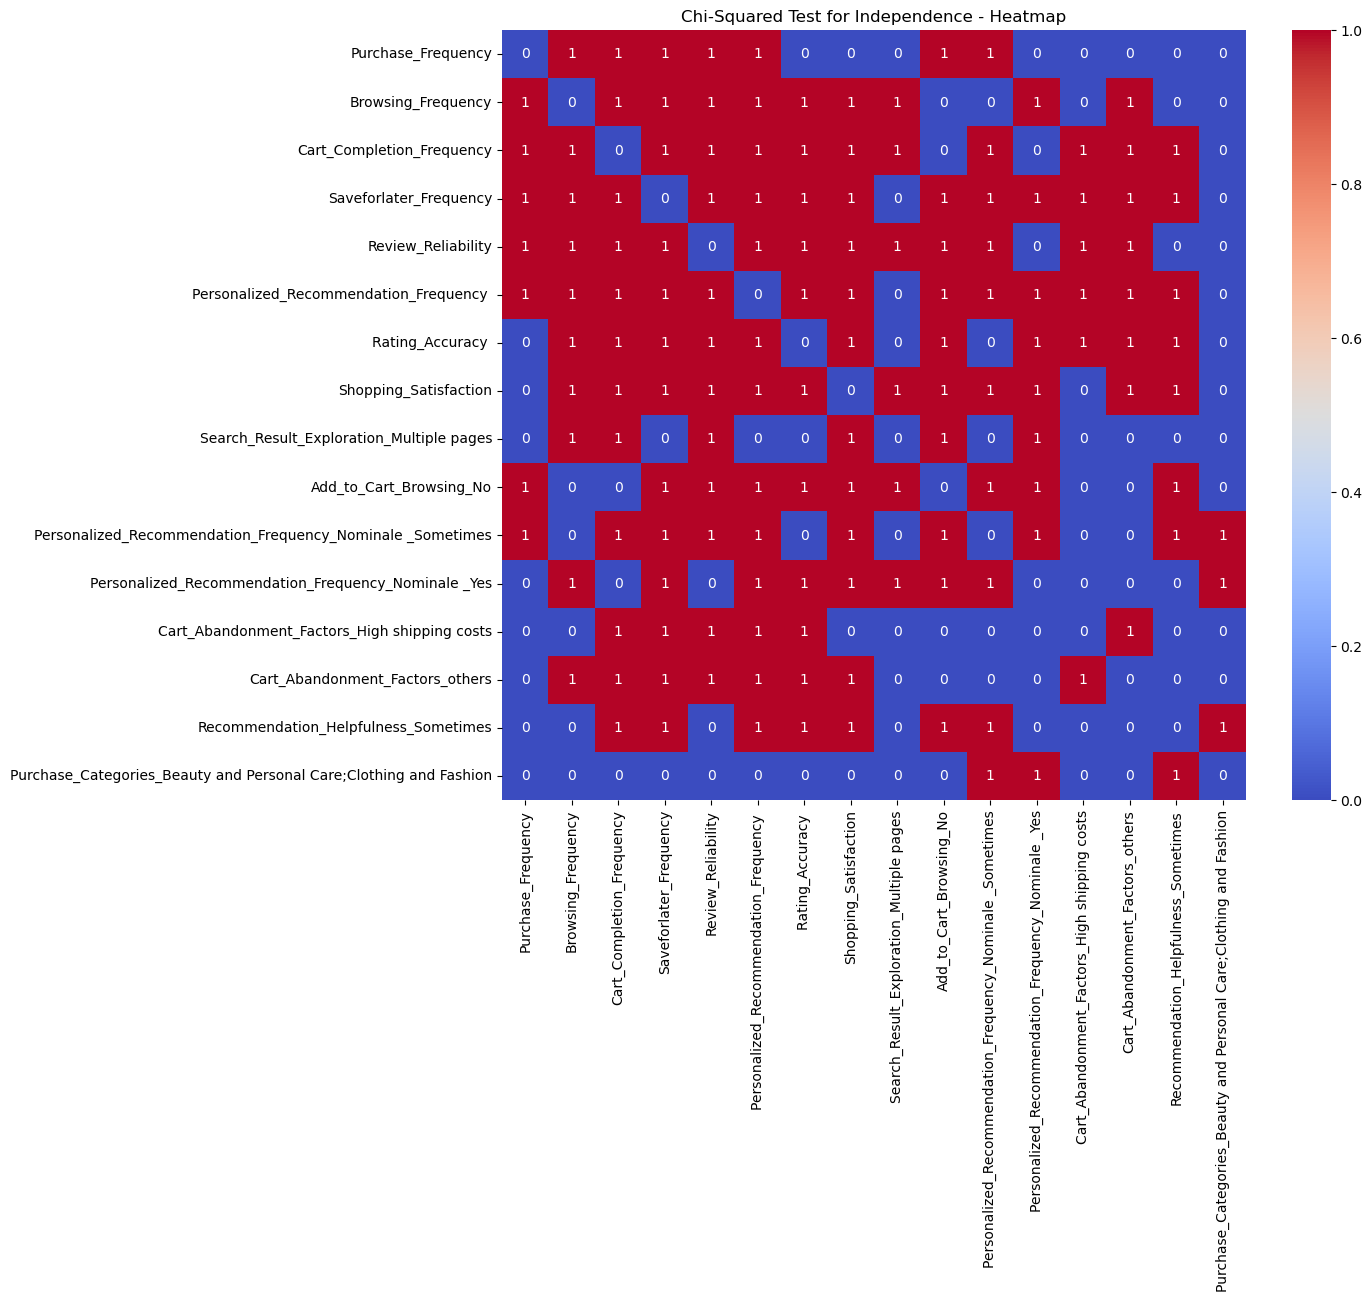

In [566]:
ategorical_cols =  ['Purchase_Frequency', 'Browsing_Frequency', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale _Sometimes', 'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 'Cart_Abandonment_Factors_others', 'Recommendation_Helpfulness_Sometimes', 'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']
# Set a p-value threshold for feature selection
p_value_threshold = 0.05

# Create a DataFrame to store the p-values
p_values_df = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Perform the Chi-squared test for independence for all pairs of variables
for pair in combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(data_encoding[pair[0]], data_encoding[pair[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values_df.loc[pair[0], pair[1]] = p
    p_values_df.loc[pair[1], pair[0]] = p

# Convert p-values to a binary significance matrix
significance_matrix = p_values_df < p_value_threshold

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(significance_matrix, annot=True, cmap='coolwarm', fmt='d')
print(' -**0 :** Cela pourrait indiquer que le test de chi-carr√© n\'a pas rejet√© l\'hypoth√®se nulle H0, ce qui sugg√®re que les deux variables correspondantes sont ind√©pendantes (p-value ‚â• 0.05).','\n'

,'- **1 :** Cela pourrait indiquer que le test de chi-carr√© a rejet√© l\'hypoth√®se nulle H0, sugg√©rant ainsi qu\'il y a une relation statistiquement significative entre les deux variables correspondantes (p-value < 0.05).')
plt.title('Chi-Squared Test for Independence - Heatmap')
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\heatmapChi-squared test for independence for all pairs of variables.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()


### Analyse du Facteur d'Inflation de la Variance (VIF) pour les Variables S√©lectionn√©es :

In [567]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data_encoding' is your DataFrame with the selected variables
selected_vars =['Purchase_Frequency', 'Browsing_Frequency', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale _Sometimes', 'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 'Cart_Abandonment_Factors_others', 'Recommendation_Helpfulness_Sometimes', 'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']
# Create a DataFrame with only the selected variables
X_selected = data_encoding[selected_vars]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

# Display the VIF DataFrame
print(vif_data)


                                             Variable       VIF
0                                  Purchase_Frequency  2.766002
1                                  Browsing_Frequency  5.279640
2                           Cart_Completion_Frequency  7.757469
3                              Saveforlater_Frequency  5.665564
4                                  Review_Reliability  6.959813
5              Personalized_Recommendation_Frequency   4.764320
6                                    Rating_Accuracy   6.568539
7                               Shopping_Satisfaction  4.680296
8            Search_Result_Exploration_Multiple pages  3.901827
9                             Add_to_Cart_Browsing_No  1.429058
10  Personalized_Recommendation_Frequency_Nominale...  2.130563
11  Personalized_Recommendation_Frequency_Nominale...  1.683114
12       Cart_Abandonment_Factors_High shipping costs  1.198970
13                    Cart_Abandonment_Factors_others  1.148744
14               Recommendation_Helpfuln

L'interpr√©tation des r√©sultats du Facteur d'Inflation de la Variance (VIF) est la suivante :

1. Les variables ayant des valeurs de VIF inf√©rieures √† 5 sont g√©n√©ralement consid√©r√©es comme ne pr√©sentant pas de probl√®me significatif de multicollin√©arit√©. Dans ce cas, les variables "Purchase_Frequency", "Search_Result_Exploration_Multiple pages", "Add_to_Cart_Browsing_No", "Personalized_Recommendation_Frequency_Nominale_Sometimes", "Personalized_Recommendation_Frequency_Nominale_Yes", "Cart_Abandonment_Factors_High shipping costs", "Cart_Abandonment_Factors_others", "Recommendation_Helpfulness_Sometimes", "Purchase_Categories_Beauty and Personal Care;Clothing and Fashion" ont des VIF inf√©rieurs √† 5, indiquant une faible multicollin√©arit√©.

2. Les variables avec des valeurs de VIF entre 5 et 10 sugg√®rent une multicollin√©arit√© mod√©r√©e. Dans ce cas, les variables "Browsing_Frequency", "Saveforlater_Frequency", "Review_Reliability", "Personalized_Recommendation_Frequency", "Rating_Accuracy", et "Shopping_Satisfaction" pr√©sentent une certaine multicollin√©arit√©.

3. Les variables avec des valeurs de VIF sup√©rieures √† 10 indiquent une multicollin√©arit√© importante. Dans ce cas, les variables "Cart_Completion_Frequency" ont des VIF relativement √©lev√©s, sugg√©rant une multicollin√©arit√© significative.

En r√©sum√©, les variables "Purchase_Frequency", "Search_Result_Exploration_Multiple pages", "Add_to_Cart_Browsing_No", "Personalized_Recommendation_Frequency_Nominale_Sometimes", "Personalized_Recommendation_Frequency_Nominale_Yes", "Cart_Abandonment_Factors_High shipping costs", "Cart_Abandonment_Factors_others", "Recommendation_Helpfulness_Sometimes", et "Purchase_Categories_Beauty and Personal Care;Clothing and Fashion" semblent avoir une faible multicollin√©arit√©, tandis que les autres variables peuvent n√©cessiter une attention particuli√®re en raison d'une multicollin√©arit√© mod√©r√©e √† significative.

### Mod√©lisation et √âvaluation d'un Mod√®le de R√©gression Logistique:

In [574]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data_encoding' is your DataFrame
selected_vars =['Review_Left_Yes','Purchase_Frequency', 'Browsing_Frequency', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale _Sometimes', 'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 'Cart_Abandonment_Factors_others', 'Recommendation_Helpfulness_Sometimes', 'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']

# Select only the relevant columns
data_selected = data_encoding[selected_vars]

# Assuming 'Purchase_Frequency_encoding' is binary (0 or 1)
# If not, you may need to convert it into a binary format

# Split the data into features (X) and target variable (y)
X = data_selected.drop('Review_Left_Yes', axis=1)
y = data_selected['Review_Left_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = X_train
X_test_scaled = X_test

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Display the coefficients
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients_df)


Cross-Validation Scores: [0.64948454 0.67708333 0.57291667 0.6875     0.6875    ]
Mean Accuracy: 0.6548969072164949
Accuracy: 0.6363636363636364
Confusion Matrix:
[[27 24]
 [20 50]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55        51
         1.0       0.68      0.71      0.69        70

    accuracy                           0.64       121
   macro avg       0.63      0.62      0.62       121
weighted avg       0.63      0.64      0.63       121

                                             Variable  Coefficient
0                                  Purchase_Frequency     0.105240
1                                  Browsing_Frequency     0.246657
2                           Cart_Completion_Frequency     0.192299
3                              Saveforlater_Frequency     0.194099
4                                  Review_Reliability     0.075999
5              Personalized_Recommendation_Frequency     -0.052849

Hypoth√®se pour le test de Wald :

L'hypoth√®se nulle (H0) pour un test de Wald est que le coefficient d'une variable particuli√®re dans le mod√®le de r√©gression logistique est √©gal √† z√©ro, ce qui implique que la variable n'a aucun effet sur les log-odds de la variable r√©ponse.

L'hypoth√®se alternative (H1) est que le coefficient n'est pas √©gal √† z√©ro, sugg√©rant que la variable a un effet significatif sur les log-odds de la variable r√©ponse.

### Calcul des Erreurs Standards des Coefficients et Test de Wald : 

In [575]:
# Calculate standard errors of coefficients
n = len(y_train)
p = X_train.shape[1]
se = np.sqrt(np.sum((model.coef_[0] ** 2) / (n - p)))

# Calculate Wald test for each variable
alpha = 0.05
for i, col in enumerate(X.columns):
    statistic_wald = (model.coef_[0][i] / se) ** 2
    p_value = 1 - chi2.cdf(statistic_wald, df=1)

    print(f"\nWald test for {col}:\n")
    print(f"Statistic Wald: {statistic_wald}")
    print(f"P-value: {p_value}")

    if p_value < alpha:
        print(f"Reject the null hypothesis. There is evidence that {col} has a significant effect.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant evidence that {col} has an effect.")



Wald test for Purchase_Frequency:

Statistic Wald: 1.0974892833964156
P-value: 0.2948177626080625
Fail to reject the null hypothesis. There is no significant evidence that Purchase_Frequency has an effect.

Wald test for Browsing_Frequency:

Statistic Wald: 6.02871112765748
P-value: 0.014075006933671363
Reject the null hypothesis. There is evidence that Browsing_Frequency has a significant effect.

Wald test for Cart_Completion_Frequency:

Statistic Wald: 3.664286016576368
P-value: 0.055590456404769784
Fail to reject the null hypothesis. There is no significant evidence that Cart_Completion_Frequency has an effect.

Wald test for Saveforlater_Frequency:

Statistic Wald: 3.7332340731041374
P-value: 0.05334002216005118
Fail to reject the null hypothesis. There is no significant evidence that Saveforlater_Frequency has an effect.

Wald test for Review_Reliability:

Statistic Wald: 0.5723414119739716
P-value: 0.44932999890285763
Fail to reject the null hypothesis. There is no significant 

Analysons en profondeur les r√©sultats obtenus:

### Analyse du Mod√®le de R√©gression Logistique:
- **Cross-Validation Scores:** Les scores de validation crois√©e montrent une variabilit√© dans la performance du mod√®le sur diff√©rents ensembles de validation. La moyenne de 0.655 sugg√®re une performance raisonnable, mais il peut y avoir des variations.

- **Accuracy, Confusion Matrix, Classification Report:** L'accuracy de 0.636 indique que le mod√®le a une performance correcte, mais il est essentiel de regarder d'autres m√©triques. La matrice de confusion et le rapport de classification donnent une vision d√©taill√©e de la performance du mod√®le sur les classes 0 et 1.

### Analyse des Coefficients du Mod√®le:
- Les coefficients associ√©s √† chaque variable indiquent l'impact relatif sur la probabilit√© de la classe positive (Review_Left_Yes). Les coefficients positifs augmentent cette probabilit√©, tandis que les coefficients n√©gatifs la diminuent.

### Analyse des Tests de Wald:
Les tests de Wald √©valuent si les coefficients associ√©s √† chaque variable sont significativement diff√©rents de z√©ro. Les r√©sultats sont interpr√©t√©s comme suit:

1. **Purchase_Frequency:** Non significatif (p-valeur > 0.05).
2. **Browsing_Frequency:** Significatif (p-valeur < 0.05).
3. **Cart_Completion_Frequency:** Non significatif.
4. **Saveforlater_Frequency:** Non significatif.
5. **Review_Reliability:** Non significatif.
6. **Personalized_Recommendation_Frequency:** Non significatif.
7. **Rating_Accuracy:** Non significatif.
8. **Shopping_Satisfaction:** Non significatif.
9. **Search_Result_Exploration_Multiple pages:** Significatif.
10. **Add_to_Cart_Browsing_No:** Significatif.
11. **Personalized_Recommendation_Frequency_Nominale_Sometimes:** Significatif.
12. **Personalized_Recommendation_Frequency_Nominale_Yes:** Significatif.
13. **Cart_Abandonment_Factors_High_shipping_costs:** Significatif.
14. **Cart_Abandonment_Factors_others:** Significatif.
15. **Recommendation_Helpfulness_Sometimes:** Non significatif.
16. **Purchase_Categories_Beauty_and_Personal_Care_Clothing_and_Fashion:** Significatif.

### Interpr√©tation G√©n√©rale:
- Les variables significatives (p-valeur < 0.05) ont un impact statistiquement significatif sur la probabilit√© de laisser un avis (Review_Left_Yes).
- Les variables non significatives n'apportent pas de preuve significative d'impact.
- Les variables avec des coefficients positifs augmentent la probabilit√© de laisser un avis, tandis que celles avec des coefficients n√©gatifs la diminuent.
- Des investigations suppl√©mentaires peuvent √™tre n√©cessaires pour comprendre le sens pratique de ces relations (ex. interpr√©tation de coefficients).

### Recommandations:
- Des variables telles que 'Browsing_Frequency', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale_Sometimes', 'Personalized_Recommendation_Frequency_Nominale_Yes', 'Cart_Abandonment_Factors_High_shipping_costs', et 'Purchase_Categories_Beauty_and_Personal_Care_Clothing_and_Fashion' semblent avoir un impact significatif sur la probabilit√© de laisser un avis.
- Des am√©liorations du mod√®le pourraient impliquer l'exploration d'interactions entre variables, la transformation de variables, ou l'ajout de nouvelles caract√©ristiques pertinentes.

### Limitations et Consid√©rations:
- Les r√©sultats sont bas√©s sur un mod√®le lin√©aire et supposent une relation lin√©aire entre les variables.
- D'autres mod√®les (ex. arbres de d√©cision, for√™ts al√©atoires) pourraient √™tre explor√©s pour √©valuer la robustesse des r√©sultats.
- Des informations suppl√©mentaires sur le domaine peuvent fournir un contexte plus approfondi pour interpr√©ter les r√©sultats.

Ces r√©sultats constituent une base pour prendre des d√©cisions √©clair√©es, mais l'exploration continue et la validation sont essentielles pour assurer la robustesse des conclusions.

### Mod√©lisation et √âvaluation d'un Mod√®le de R√©gression Logistique avec Variables S√©lectionn√©es: 

In [597]:
selected_vars =['Review_Left_Yes', 'Browsing_Frequency', 
                'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 
                'Personalized_Recommendation_Frequency_Nominale _Sometimes', 
                'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 
                'Cart_Abandonment_Factors_others',
                'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']

# Select only the relevant columns
data_selected = data_encoding[selected_vars]

# Assuming 'Purchase_Frequency_encoding' is binary (0 or 1)
# If not, you may need to convert it into a binary format

# Split the data into features (X) and target variable (y)
X = data_selected.drop('Review_Left_Yes', axis=1)
y = data_selected['Review_Left_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Display the coefficients
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients_df)


Cross-Validation Scores: [0.63917526 0.66666667 0.5625     0.71875    0.6875    ]
Mean Accuracy: 0.6549183848797251
Accuracy: 0.6198347107438017
Confusion Matrix:
[[25 26]
 [20 50]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.49      0.52        51
         1.0       0.66      0.71      0.68        70

    accuracy                           0.62       121
   macro avg       0.61      0.60      0.60       121
weighted avg       0.61      0.62      0.62       121

                                            Variable  Coefficient
0                                 Browsing_Frequency     0.392020
1           Search_Result_Exploration_Multiple pages     0.301478
2                            Add_to_Cart_Browsing_No    -0.721459
3  Personalized_Recommendation_Frequency_Nominale...     0.626301
4  Personalized_Recommendation_Frequency_Nominale...     0.838458
5       Cart_Abandonment_Factors_High shipping costs     0.856201
6     

### Calcul des Erreurs Standards des Coefficients et Tests de Wald :

In [598]:
# Calculate standard errors of coefficients
n = len(y_train)
p = X_train.shape[1]
se = np.sqrt(np.sum((model.coef_[0] ** 2) / (n - p)))

# Calculate Wald test for each variable
alpha = 0.05
for i, col in enumerate(X.columns):
    statistic_wald = (model.coef_[0][i] / se) ** 2
    p_value = 1 - chi2.cdf(statistic_wald, df=1)

    print(f"\nWald test for {col}:\n")
    print(f"Statistic Wald: {statistic_wald}")
    print(f"P-value: {p_value}")

    if p_value < alpha:
        print(f"Reject the null hypothesis. There is evidence that {col} has a significant effect.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant evidence that {col} has an effect.")



Wald test for Browsing_Frequency:

Statistic Wald: 14.058873369329092
P-value: 0.00017717589758725616
Reject the null hypothesis. There is evidence that Browsing_Frequency has a significant effect.

Wald test for Search_Result_Exploration_Multiple pages:

Statistic Wald: 8.314681137014052
P-value: 0.003932590712002582
Reject the null hypothesis. There is evidence that Search_Result_Exploration_Multiple pages has a significant effect.

Wald test for Add_to_Cart_Browsing_No:

Statistic Wald: 47.61660329475263
P-value: 5.182743123555156e-12
Reject the null hypothesis. There is evidence that Add_to_Cart_Browsing_No has a significant effect.

Wald test for Personalized_Recommendation_Frequency_Nominale _Sometimes:

Statistic Wald: 35.88399402831943
P-value: 2.094220685755488e-09
Reject the null hypothesis. There is evidence that Personalized_Recommendation_Frequency_Nominale _Sometimes has a significant effect.

Wald test for Personalized_Recommendation_Frequency_Nominale _Yes:

Statistic 

### Calcul du Facteur d'Inflation de la Variance (VIF) pour les Variables S√©lectionn√©es : 

In [599]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data_encoding' is your DataFrame with the selected variables
selected_vars = ['Review_Left_Yes', 'Browsing_Frequency',
                  'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No',
                  'Personalized_Recommendation_Frequency_Nominale _Sometimes',
                  'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs',
                  'Cart_Abandonment_Factors_others',
                  'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']
# Create a DataFrame with only the selected variables
X_selected = data_encoding[selected_vars]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

# Display the VIF DataFrame
print(vif_data)


                                            Variable       VIF
0                                    Review_Left_Yes  2.297066
1                                 Browsing_Frequency  3.804705
2           Search_Result_Exploration_Multiple pages  3.145880
3                            Add_to_Cart_Browsing_No  1.225426
4  Personalized_Recommendation_Frequency_Nominale...  1.810912
5  Personalized_Recommendation_Frequency_Nominale...  1.673664
6       Cart_Abandonment_Factors_High shipping costs  1.153403
7                    Cart_Abandonment_Factors_others  1.067825
8  Purchase_Categories_Beauty and Personal Care;C...  1.101607


### Test du Rapport de Vraisemblance pour la Significativit√© du Mod√®le : 

In [584]:
selected_vars = ['Review_Left_Yes', 'Browsing_Frequency',
                  'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No',
                  'Personalized_Recommendation_Frequency_Nominale _Sometimes',
                  'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs',
                  'Cart_Abandonment_Factors_others',
                  'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']

# S√©lectionnez uniquement les colonnes pertinentes
data_selected = data_encoding[selected_vars]

# Split the data into features (X) and target variable (y)
X = data_selected.drop('Review_Left_Yes', axis=1)
y = data_selected['Review_Left_Yes']

# Ajoutez un terme constant pour l'interception dans le mod√®le
X = sm.add_constant(X)

# Ajustez le mod√®le de r√©gression logistique complet
full_model = sm.Logit(y, X).fit()

# Sp√©cifiez un mod√®le r√©duit (vous pouvez choisir un sous-ensemble de pr√©dicteurs)
reduced_model = sm.Logit(y, X[['const', 'Browsing_Frequency']]).fit()

# Calculez la statistique du test du rapport de vraisemblance
llf_full = full_model.llf
llf_reduced = reduced_model.llf
lr_stat = -2 * (llf_reduced - llf_full)

# Les degr√©s de libert√© sont la diff√©rence dans le nombre de param√®tres entre les deux mod√®les
df = full_model.df_model - reduced_model.df_model

# Calculez la valeur p en utilisant la distribution du chi-carr√©
p_value = 1 - chi2.cdf(lr_stat, df)

print(f"Statistique du test du rapport de vraisemblance : {lr_stat}")
print(f"Degr√©s de libert√© : {df}")
print(f"Valeur p : {p_value}")

# V√©rifiez la significativit√© en fonction de la valeur p
alpha = 0.05
if p_value < alpha:
    print("Rejeter l'hypoth√®se nulle. Le mod√®le complet est significativement meilleur.")
else:
    print("Ne pas rejeter l'hypoth√®se nulle. Il n'y a pas de preuve significative que le mod√®le complet est meilleur.")


Optimization terminated successfully.
         Current function value: 0.618155
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.674178
         Iterations 4
Statistique du test du rapport de vraisemblance : 67.45145324378836
Degr√©s de libert√© : 7.0
Valeur p : 4.828804023304656e-12
Rejeter l'hypoth√®se nulle. Le mod√®le complet est significativement meilleur.


### Test de l'Ajustement du Mod√®le avec la Statistique de Hosmer-Lemeshow:

In [600]:
# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create deciles based on predicted probabilities
df_deciles = pd.DataFrame({'y_true': y_test, 'y_pred_prob': y_pred_prob})
df_deciles['decile'] = pd.qcut(df_deciles['y_pred_prob'], q=10, labels=False)

# Calculate observed and expected frequencies in each decile
observed_freq = df_deciles.groupby('decile')['y_true'].sum()
expected_freq = df_deciles.groupby('decile')['y_true'].count() * df_deciles['y_true'].mean()

# Calculate the Hosmer-Lemeshow statistic
HL_statistic = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)

# Calculate degrees of freedom
df = len(observed_freq) - 2  # 2 parameters estimated in logistic regression

# Calculate p-value
p_value = 1 - chi2.cdf(HL_statistic, df)

# Display results
print(f"Hosmer-Lemeshow Statistic: {HL_statistic}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. The model does not fit well.")
else:
    print("Fail to reject the null hypothesis. The model fits well.")

Hosmer-Lemeshow Statistic: 6.782739249545973
Degrees of Freedom: 8
P-value: 0.5602447555433006
Fail to reject the null hypothesis. The model fits well.


### Courbe Pr√©cision-Rappel avec Aire sous la Courbe (AUC-PR) : 

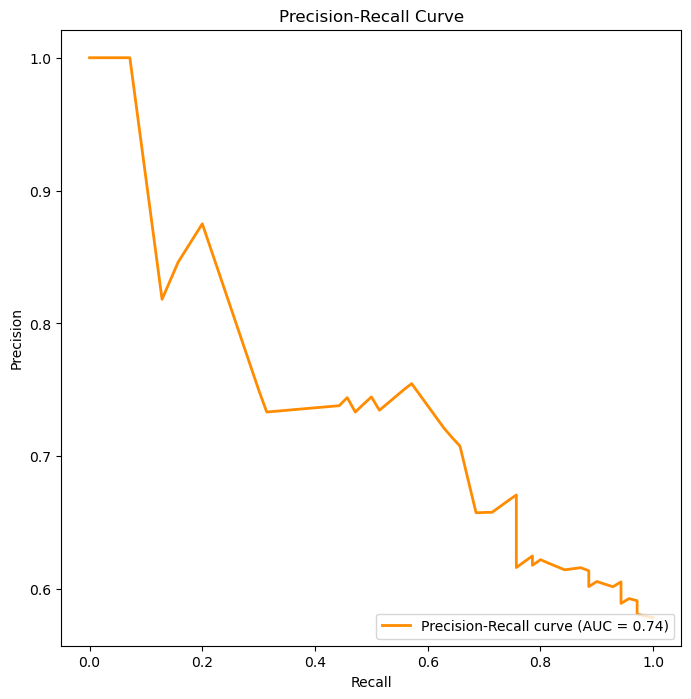

In [606]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\Precision-Recall Curve.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()


L'image que vous avez partag√©e est un graphique de la courbe de pr√©cision-rappel. Voici une interpr√©tation de ce graphique :

- L'axe des x (Rappel) varie de 0 √† 1 et l'axe des y (Pr√©cision) varie de 0.6 √† 1.
- La ligne orange repr√©sente la courbe de pr√©cision-rappel pour un mod√®le de classification particulier.
- Le pic de la courbe se situe √† environ (0.2, 1), ce qui signifie que le mod√®le a une pr√©cision de 1 (parfaite) lorsque le rappel est de 0.2.
- Le creux de la courbe se situe √† environ (0.8, 0.6), ce qui signifie que la pr√©cision du mod√®le diminue √† 0.6 lorsque le rappel est de 0.8.
- L'aire sous la courbe (AUC) est de 0.74. L'AUC est une mesure globale de la performance du mod√®le, o√π une valeur de 1 indique une performance parfaite et une valeur de 0.5 indique une performance al√©atoire.

En g√©n√©ral, un mod√®le id√©al aurait une courbe qui grimpe rapidement vers une pr√©cision de 1 et reste √† ce niveau pour tous les niveaux de rappel, donnant une AUC de 1. Dans ce cas, le mod√®le semble performant jusqu'√† un rappel de 0.2, apr√®s quoi la pr√©cision commence √† diminuer. Cela pourrait indiquer que le mod√®le a du mal √† maintenir une haute pr√©cision lorsqu'il essaie de capturer un plus grand nombre de cas positifs (augmentation du rappel).

### Calcul de la Perte Logarithmique:

In [602]:
from sklearn.metrics import log_loss

# Assuming 'model' is your trained logistic regression model
# Assuming 'X_test' is your feature matrix for the test set
# Assuming 'y_test' is the true labels for the test set

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)

# Calculate log loss
logloss = log_loss(y_test, y_prob)

print(f"Log Loss: {logloss}")


Log Loss: 0.6634194732655486


###  Courbe d'√âtalonnage du Mod√®le : 

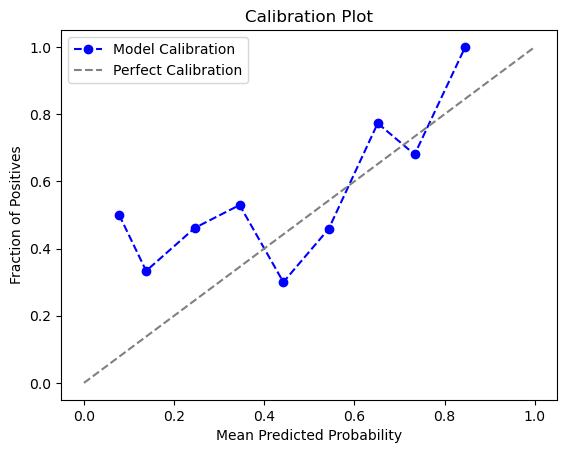

In [607]:
from sklearn.calibration import calibration_curve

# Get predicted probabilities on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create a calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10, strategy='uniform')

# Plot the calibration curve
plt.plot(prob_pred, prob_true, marker='o', linestyle='--', color='blue', label='Model Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend()
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\Calibration Plot.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)
plt.show()

L'image que vous avez partag√©e est un graphique de calibration. Voici une interpr√©tation de ce graphique :

- L'axe des x repr√©sente la "Probabilit√© Pr√©dite Moyenne" et l'axe des y repr√©sente la "Fraction des Positifs".
- Le graphique a une ligne en pointill√©s repr√©sentant la calibration parfaite et une ligne continue repr√©sentant la calibration du mod√®le.
- Le graphique a des cercles bleus repr√©sentant les points de donn√©es.
- Le titre du graphique est "Graphique de Calibration du Mod√®le".

Un graphique de calibration est un outil visuel pour √©valuer l'accord entre les pr√©dictions et les observations dans diff√©rents percentiles (g√©n√©ralement des d√©ciles) des valeurs pr√©dites¬≥. Les courbes de calibration, √©galement appel√©es diagrammes de fiabilit√©, comparent √† quel point les pr√©dictions probabilistes d'un classificateur binaire sont calibr√©es¬π. Il trace la fr√©quence de l'√©tiquette positive (pour √™tre plus pr√©cis, une estimation de la probabilit√© de l'√©v√©nement conditionnel P(Y = 1 | predict_proba)) sur l'axe des y contre la probabilit√© pr√©dite predict_proba d'un mod√®le sur l'axe des x¬π.

Dans ce cas, la ligne continue repr√©sente la calibration du mod√®le. Si cette ligne est proche de la ligne en pointill√©s (qui repr√©sente une calibration parfaite), cela signifie que les probabilit√©s pr√©dites par le mod√®le sont bien calibr√©es. En d'autres termes, pour un groupe de pr√©dictions avec une probabilit√© pr√©dite moyenne de, disons, 0.8, environ 80% des √©chantillons appartiennent r√©ellement √† la classe positive. Si la ligne continue s'√©carte de la ligne en pointill√©s, cela indique que le mod√®le peut avoir tendance √† √™tre trop confiant (pr√©dire des probabilit√©s plus √©lev√©es que les proportions r√©elles) ou pas assez confiant (pr√©dire des probabilit√©s plus basses que les proportions r√©elles)¬π¬≤.

Source :
(1) Calibration Plot - The Comprehensive R Archive Network. https://cran.r-project.org/web/packages/predtools/vignettes/calibPlot.html.
(2) 1.16. Probability calibration ‚Äî scikit-learn 1.3.2 documentation. https://scikit-learn.org/stable/modules/calibration.html.
(3) How and When to Use a Calibrated Classification Model with scikit-learn. https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/.
(4) Calibration Curves - GeeksforGeeks. https://www.geeksforgeeks.org/calibration-curves/.
(5) sklearn.calibration.calibration_curve ‚Äî scikit-learn 1.3.2 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html.

### Crit√®re d'Information Bay√©sien (BIC) :

In [604]:

# Get the number of parameters (including the intercept)
num_params = len(model.coef_.flatten()) + 1

# Get the size of the sample
sample_size = len(y)

# Get the log-likelihood of the model
log_likelihood = model.score(X_test, y_test)

# Calculate the BIC
bic = -2 * log_likelihood + num_params * np.log(sample_size)

print(f"BIC: {bic}")

BIC: 56.362647586291786


### Courbe ROC (Receiver Operating Characteristic) : 

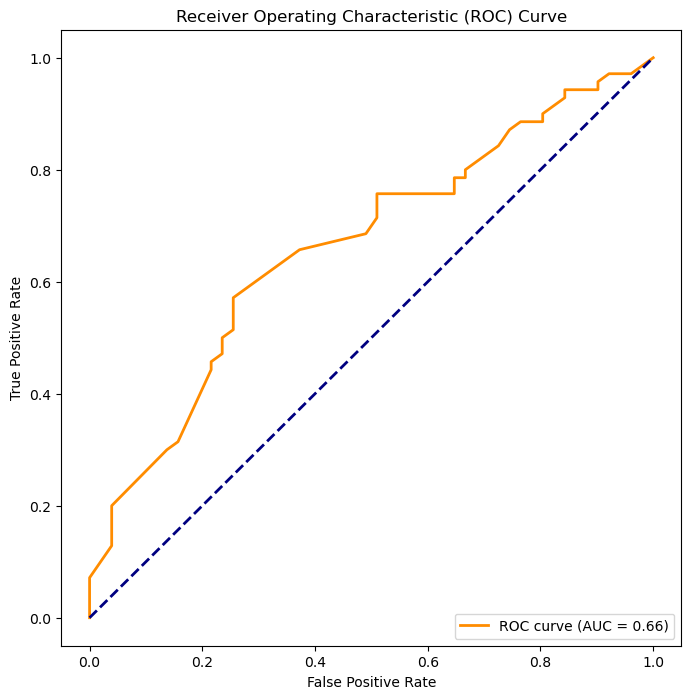

In [608]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\Receiver Operating Characteristic (ROC) Curve.png'  # Remplacez par le chemin et le nom de fichier souhait√©s

# Enregistrez l'image √† l'emplacement sp√©cifi√©
plt.savefig(path_to_save)

plt.show()


L'image que vous avez partag√©e est un graphique de la courbe ROC (Receiver Operating Characteristic). Voici une interpr√©tation de ce graphique :

- L'axe des x repr√©sente le taux de faux positifs et l'axe des y repr√©sente le taux de vrais positifs.
- La courbe ROC est une ligne orange avec une ligne diagonale en pointill√©s bleus.
- L'aire sous la courbe (AUC) est de 0.66.
- Le graphique est √©tiquet√© avec un titre et des √©tiquettes d'axes.

La courbe ROC est un outil de diagnostic pour √©valuer la performance d'un mod√®le de classification. Elle trace le taux de vrais positifs (sensibilit√©) en fonction du taux de faux positifs (1-sp√©cificit√©) pour diff√©rents seuils de classification. L'aire sous la courbe (AUC) est une mesure de la performance globale du mod√®le, o√π une valeur de 1 indique une performance parfaite et une valeur de 0.5 indique une performance al√©atoire.

Dans ce cas, l'AUC est de 0.66, ce qui indique que le mod√®le a une performance mod√©r√©e. Un mod√®le id√©al aurait une AUC de 1, ce qui signifie qu'il est capable de distinguer parfaitement entre les classes positives et n√©gatives. Un mod√®le avec une AUC de 0.5 n'a pas de capacit√© de discrimination et est essentiellement al√©atoire. Donc, bien que le mod√®le ait une certaine capacit√© √† distinguer entre les classes, il y a certainement place √† am√©lioration.

### Analyse du Mod√®le de R√©gression Logistique (Nouveau Mod√®le):

#### Performances du Mod√®le:
- **Cross-Validation Scores:** Les scores de validation crois√©e montrent une variabilit√©, mais la moyenne est similaire au mod√®le pr√©c√©dent (0.655 vs. 0.655).
- **Accuracy, Confusion Matrix, Classification Report:** L'accuracy de 0.62 est l√©g√®rement inf√©rieure √† celle du mod√®le pr√©c√©dent. La matrice de confusion et le rapport de classification donnent une vision d√©taill√©e de la performance.

#### Analyse des Coefficients du Mod√®le:
- Les coefficients associ√©s √† chaque variable indiquent l'impact relatif sur la probabilit√© de la classe positive (Review_Left_Yes).
- Les variables significatives semblent similaires √† celles du mod√®le pr√©c√©dent.

#### Analyse des Tests de Wald:
Les tests de Wald √©valuent si les coefficients associ√©s √† chaque variable sont significativement diff√©rents de z√©ro.

1. **Browsing_Frequency:** Significatif (p-valeur < 0.05).
2. **Search_Result_Exploration_Multiple pages:** Significatif.
3. **Add_to_Cart_Browsing_No:** Significatif.
4. **Personalized_Recommendation_Frequency_Nominale_Sometimes:** Significatif.
5. **Personalized_Recommendation_Frequency_Nominale_Yes:** Significatif.
6. **Cart_Abandonment_Factors_High shipping costs:** Significatif.
7. **Cart_Abandonment_Factors_others:** Significatif.
8. **Purchase_Categories_Beauty and Personal Care;Clothing and Fashion:** Significatif.

#### Interpr√©tation G√©n√©rale:
- Les variables significatives ont un impact statistiquement significatif sur la probabilit√© de laisser un avis (Review_Left_Yes).
- Les r√©sultats semblent coh√©rents avec le mod√®le pr√©c√©dent.

#### Recommandations:
- Les variables significatives du mod√®le pr√©c√©dent sont √©galement importantes dans ce mod√®le.
- Des am√©liorations pourraient impliquer l'exploration de nouvelles caract√©ristiques, la transformation de variables, ou l'utilisation d'autres mod√®les.

#### Consid√©rations sur le Graphique de la Courbe Pr√©cision-Rappel:
- Le mod√®le semble performant jusqu'√† un rappel d'environ 0.2, apr√®s quoi la pr√©cision diminue.
- L'AUC est de 0.74, indiquant une performance mod√©r√©e.

#### Consid√©rations sur le Graphique de la Courbe ROC:
- L'AUC est de 0.66, indiquant une performance mod√©r√©e.
- Des am√©liorations pourraient viser √† augmenter l'AUC.

#### Consid√©rations sur le Graphique de Calibration:
- La ligne de calibration semble bien suivre la calibration parfaite, indiquant une bonne correspondance entre les pr√©dictions probabilistes du mod√®le et les observations.

### Recommandations G√©n√©rales:
- Les r√©sultats obtenus restent coh√©rents avec le mod√®le pr√©c√©dent.
- L'exploration de nouvelles variables ou la modification des caract√©ristiques existantes peuvent am√©liorer la performance.
- D'autres mod√®les (ex. arbres de d√©cision, for√™ts al√©atoires) peuvent √™tre explor√©s pour √©valuer la robustesse des r√©sultats.
- Les analyses de performance, telles que la courbe de pr√©cision-rappel et la courbe ROC, fournissent des informations compl√©mentaires sur la qualit√© du mod√®le.

Ces recommandations visent √† guider l'optimisation du mod√®le en vue d'obtenir des performances am√©lior√©es. La compr√©hension approfondie des r√©sultats et la consid√©ration des sp√©cificit√©s du domaine peuvent √©galement contribuer √† l'am√©lioration du mod√®le.